## **Group-$10$:**

### **Members:**
* $11940140$ - **Anmol Singhal**
* $11940220$ - **Ayushi Thakur**
* $11941060$ - **Samarth Singh Pawar**
* $11941140$ - **Shubham Gupta**

## **Research Paper:**

We have selected the research paper with **Code Not Available**.

All the code has been written by us in Full.

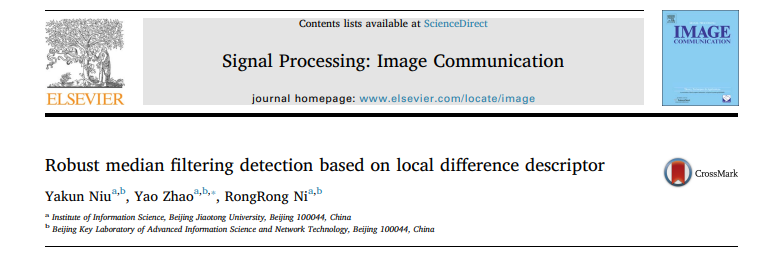

## **THEORY**

We will use a **Local Difference Descriptor (LDD)** which is a set of features that we will use to discriminate between median filtered and non-median filtered images. 

$LDD$ will consist of: 

1. **Joint Histogram of Rotation Invariant Uniform LBP**
2. **Corellation Coefficient of PDM**

### **1. Joint Histogram of Rotation Invariant Uniform LBP:**

#### **LBP (Local Binary Pattern):**

LBP is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number. Due to its discriminative power and computational simplicity, LBP texture operator has become a popular approach in various applications. It can be used for texture classification, segmentation, face recognition, and other applications.

**Formulation:**

The LBP operator can be written as:

$$LBP_{P,R} = \sum_{p=0}^{P-1} s(g_p - g_c)2^p$$

where $g_c$ is the intensity of the center pixel and $g_p$ is the intensity of the neighboring pixels. $s(x)$ is a function that returns 0 if $x$ is negative and 1 otherwise. $P$ is the number of pixels in the neighborhood and $R$ is the radius of the neighborhood.

#### **Rotation Invariant LBP:**

In rotation invariant LBP, we cycle through all possible rotations of the binary pattern and use the smallest one as the result. For example, if the binary pattern is $10010000$, we would get $01001000$, $00100100$, $00010010$, $00001001$, $00000100$, $00000010$, $00000001$, and $10000010$. The smallest one is $00000001$, which is the result of rotation invariant LBP.

**Formulation:**

The rotation invariant LBP operator can be written as:

$$LBP_{P,R}^{ri} = min\{ROR(x, i)\}$$

where $ROR(x, i)$ is the result of rotating the binary pattern $x$ by $i$ bits to the right.

#### **Uniform LBP:**

A binary pattern is called uniform if it contains at most two bitwise transitions from 0 to 1 or vice versa when the bit pattern is traversed circularly. For example, $00000000$ and $01110000$ are uniform patterns, while $01010000$ and $11000000$ are not.

#### **Rotation Invariant Uniform LBP:**

In the paper, they have talked about rotation invariant uniform LBP because it is more discriminative than the original LBP.

**Formulation:**

The rotation invariant uniform LBP operator can be written as:

$$LBP_{P,R}^{riu2} = \begin{cases} \sum_{p=0}^{P-1} s(g_p - g_c)2^p & \text{if } U(LBP_{P, R}) \leq 2 \\ P+1 & otherwise \end{cases}$$

where $U(x)$ is the number of bitwise transitions in the binary pattern $x$.

#### **CLBP (Completed Local Binary Pattern):**

Because the conventional **LBP** descriptor just use the sign information of image local difference, and the magnitude information is discarded. Another paper (referenced by this paper) proposed a **completed LBP** descriptor by decomposing the image local difference into two complementary components, i.e., the $Sign$ $(s_p)$ and the $Magnitude$ $(m_p)$, respectively.

$$s_p = s(g_p - g_c)$$

$$m_p = |g_p - g_c|$$

where $g_p$, $g_c$ and $s(x)$ are defined above. 

Then they defined the $CLBP-Sign$ $(CLBPS)$ (i.e., $LBP$) and $CLBP-Magnitude$ $(CLBPM)$ as:

$$CLBPM_{P,R} = \sum_{p=0}^{P-1} s(m_p - c) 2^p$$

where $c$ denotes the mean value of $m_p$ in the whole image.

Hence, we get:

$$CLBPS_{P,R}^{riu2} = \begin{cases} \sum_{p=0}^{P-1} s(g_p - g_c)2^p & \text{if } U(LBP_{P, R}) \leq 2 \\ P+1 & otherwise \end{cases}$$

$$CLBPM_{P,R}^{riu2} = \begin{cases} \sum_{p=0}^{P-1} s(m_p - c)2^p & \text{if } U(LBP_{P, R}) \leq 2 \\ P+1 & otherwise \end{cases}$$

**Note: The Outputs will be converted to Rotation Invariant Form.**


The center gray level component of $CLBP$ is discard, because it describes the global information of an image. The histogram of the $CLBPC$ cannot distinguish the median filtered images from non-median filtered images. The mappings from $LBP_{P,R}$ to $CLBPS^{riu2}_{P, R}$ and $CLBPM^{riu2}_{P, R}$, which have $P + 2$ distinct output values, can be implemented with a lookup table of $2^P$ elements. 

Finally, we use the joint $2D$ histogram of the $CLBPS^{riu2}_{P, R}$ and $CLBPM^{riu2}_{P, R}$ codes as our first features set $(JHLBP)$ with $(P + 2)^2$ dimensions for median filtering detection.

### **2. Correlation Coefficients of PDM**

The local pixel differences can better describe how pixel values change and implicitly encode important micro structures. To show the behavior
of local pixel difference pair, we present the joint probability distribution of local pixel difference pair which is denoted as:

$$P^{p, q}_{i, j}(t_x, t_y) = Pr(g^p_{i, j} - g_{i,j} = t_x, g^q_{i, j} - g_{i,j} = t_y)$$

where $g^p_{i, j}$ and $g^q_{i, j}$ are the pixel values of the $p_{th}$ and $q_{th}$ neighbors of the center pixel $(i, j)$, respectively. $t_x$ and $t_y$ are the local pixel difference pair.

Essentially it is the Probability of $p_{th}$ neighbour differing by a difference of $t_x$ from the center pixel $g_{i,j}$ and $q_{th}$ neighbour differing by a difference of $t_y$ from the center pixel $g_{i,j}$.

In order to take advantage of the correlation between the local pixel difference pair, we compute the correlation coefficients of the PDM. 

#### **PDM (Pixel Difference Matrix):**

First, we obtain a PDV (Pixel Difference Vector) for each pixel in the image. The PDV is a vector of length $P$ which contains the difference between the center pixel and its $P$ neighbours. The PDV is denoted as:

$$d_i = [d_{i,1}, d_{i,2}, ..., d_{i,P}]^T$$

where $d_i$ is the PDV of $i^{th}$ pixel in the image. $d_{i,j}$ is the difference between the center pixel and its $j^{th}$ neighbour.

Now, we eliminate the PDVs whose elements are all $0$ values.

Then, we construct a PDM (Pixel Difference Matrix) for the remaining PDVs. The PDM is denoted as:

$$M = \begin{bmatrix} d_{1,1} & d_{2,1} & \cdots & d_{N,1} \\ d_{1,2} & d_{2,2} & \cdots & d_{N,2} \\ \vdots & \vdots & \ddots & \vdots \\ d_{1,P} & d_{2,P} & \cdots & d_{N,P} \end{bmatrix}$$

where $M$ is the PDM of the image. $N$ is the number of PDVs after eliminating the PDVs whose elements are all $0$ values.

The PDV measures the differences between the center point and neighboring pixels within a patch, thus it can better describe how pixel values change and can implicitly encode important visual patterns such as edges and lines in images.

Now, Joint probability is suitable to elaborate the behavior of local difference pairs. Therefore, the $Normalized$ $Cross$ $Correlation$ $(NCC)$ coefficients can be used as features to capture the joint probability of local difference pairs.

#### **Normalized Cross Correlation (NCC):**

The $NCC$ coefficient of $i^{th}$ and $j^{th}$ rows in the PDM is denoted as:

$$ NCC(i, j) = \dfrac{cov([d_{1, i}, d_{2, i}, ..., d_{N, i}]^T, [d_{1, j}, d_{2, j}, ..., d_{N, j}]^T)}{\sqrt{D([d_{1, i}, d_{2, i}, ..., d_{N, i}]^T)D([d_{1, j}, d_{2, j}, ..., d_{N, j}]^T)}}$$

where $cov$ is the covariance of two vectors and $D$ is defined as:

$$D([d_{1, i}, d_{2, i}, ..., d_{N, i}]^T) = cov([d_{1, i}, d_{2, i}, ..., d_{N, i}]^T, [d_{1, i}, d_{2, i}, ..., d_{N, i}]^T)$$

The $NCC$ coefficient is a measure of similarity between two vectors. It is equal to $1$ when the two vectors are identical, and it is equal to $0$ when the two vectors are orthogonal.

Our second set of features can be summarized as follows:
1. Group the $PDVs$ to form the $PDM$ with $P$ rows;
2. Consider an arbitrary row of $PDM$ as a random variable and obtain the $NCC$ coefficients of any different variables;
3. Concatenate all the $NCC$ coefficients of $PDM$ $(CPDM)$ to yield a $^PC_2-Dimensional$ feature vector $C$.

### **3. Final Features Set**

Combining $JHLBP$ features and $CPDM$ features, we obtain the final $LDD$ features with $(P+2)^2 + \frac{P(P-1)}{2}$ elements for median filtering
detection.

**NOTE:** As instructed in the research paper, we will use $8$ neighbours i.e. $P = 8$ and $R = 1$ where $P$ is the number of neighbours and $R$ is the radius of the neighbourhood.

## **IMPLEMENTATION**

### **Importing Libraries**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import threading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **Importing Dataset**

In [2]:
DATASET_PATH = 'ucid_dataset/ucid_v2/'

In [3]:
# Read All Images from the UCID Dataset
def read_images():
    
    images = []
    
    for i in range(1338):
        
        file_name = str(i+1)
        while(len(file_name) < 5):
            file_name = '0' + file_name
        
        # print("Reading Image: " + file_name)

        img = cv2.imread(DATASET_PATH + "ucid" + file_name  + '.tif')
        # Convert to Gray Scale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        
    return images

In [8]:
ucid_images = read_images()

In [9]:
len(ucid_images)

1338

In [10]:
ucid_images[0].shape

(384, 512)

In [11]:
# Checking Shapes of All UCID Images
shapes = {}
for img in ucid_images:
    shapes[img.shape] = shapes.get(img.shape, 0) + 1

In [12]:
shapes

{(384, 512): 885, (512, 384): 453}

In [13]:
# All Images which are of shape (512, 384), rotate them by 90 degrees
for i in range(len(ucid_images)):
    if ucid_images[i].shape == (512, 384):
        ucid_images[i] = np.rot90(ucid_images[i])

In [14]:
# Checking Shapes of All UCID Images
shapes = {}
for img in ucid_images:
    shapes[img.shape] = shapes.get(img.shape, 0) + 1

In [15]:
shapes

{(384, 512): 1338}

Now all Images are of same shape

**Checking a Sample Image**

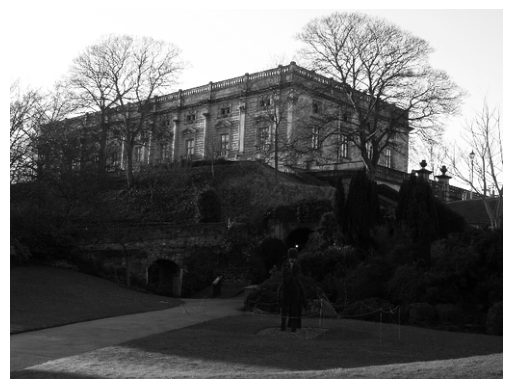

In [16]:
# Displaying a Sample Image
plt.imshow(ucid_images[0], cmap='gray')
# Remove Axis
plt.axis('off')
plt.show()

### **Creating Median Filtered and Average Filtered Images**

In [17]:
# Creating Median Filtered Dataset and Average Filtered Dataset
median_filtered_images_3 = []
median_filtered_images_5 = []
average_filtered_images_3 = []

for img in ucid_images:
    
    median_filtered_images_3.append(cv2.medianBlur(img, 3))
    median_filtered_images_5.append(cv2.medianBlur(img, 5))
    average_filtered_images_3.append(cv2.blur(img, (3, 3)))

In [18]:
# Converting to Numpy Arrays
ucid_images = np.array(ucid_images)
median_filtered_images_3 = np.array(median_filtered_images_3)
median_filtered_images_5 = np.array(median_filtered_images_5)
average_filtered_images_3 = np.array(average_filtered_images_3)

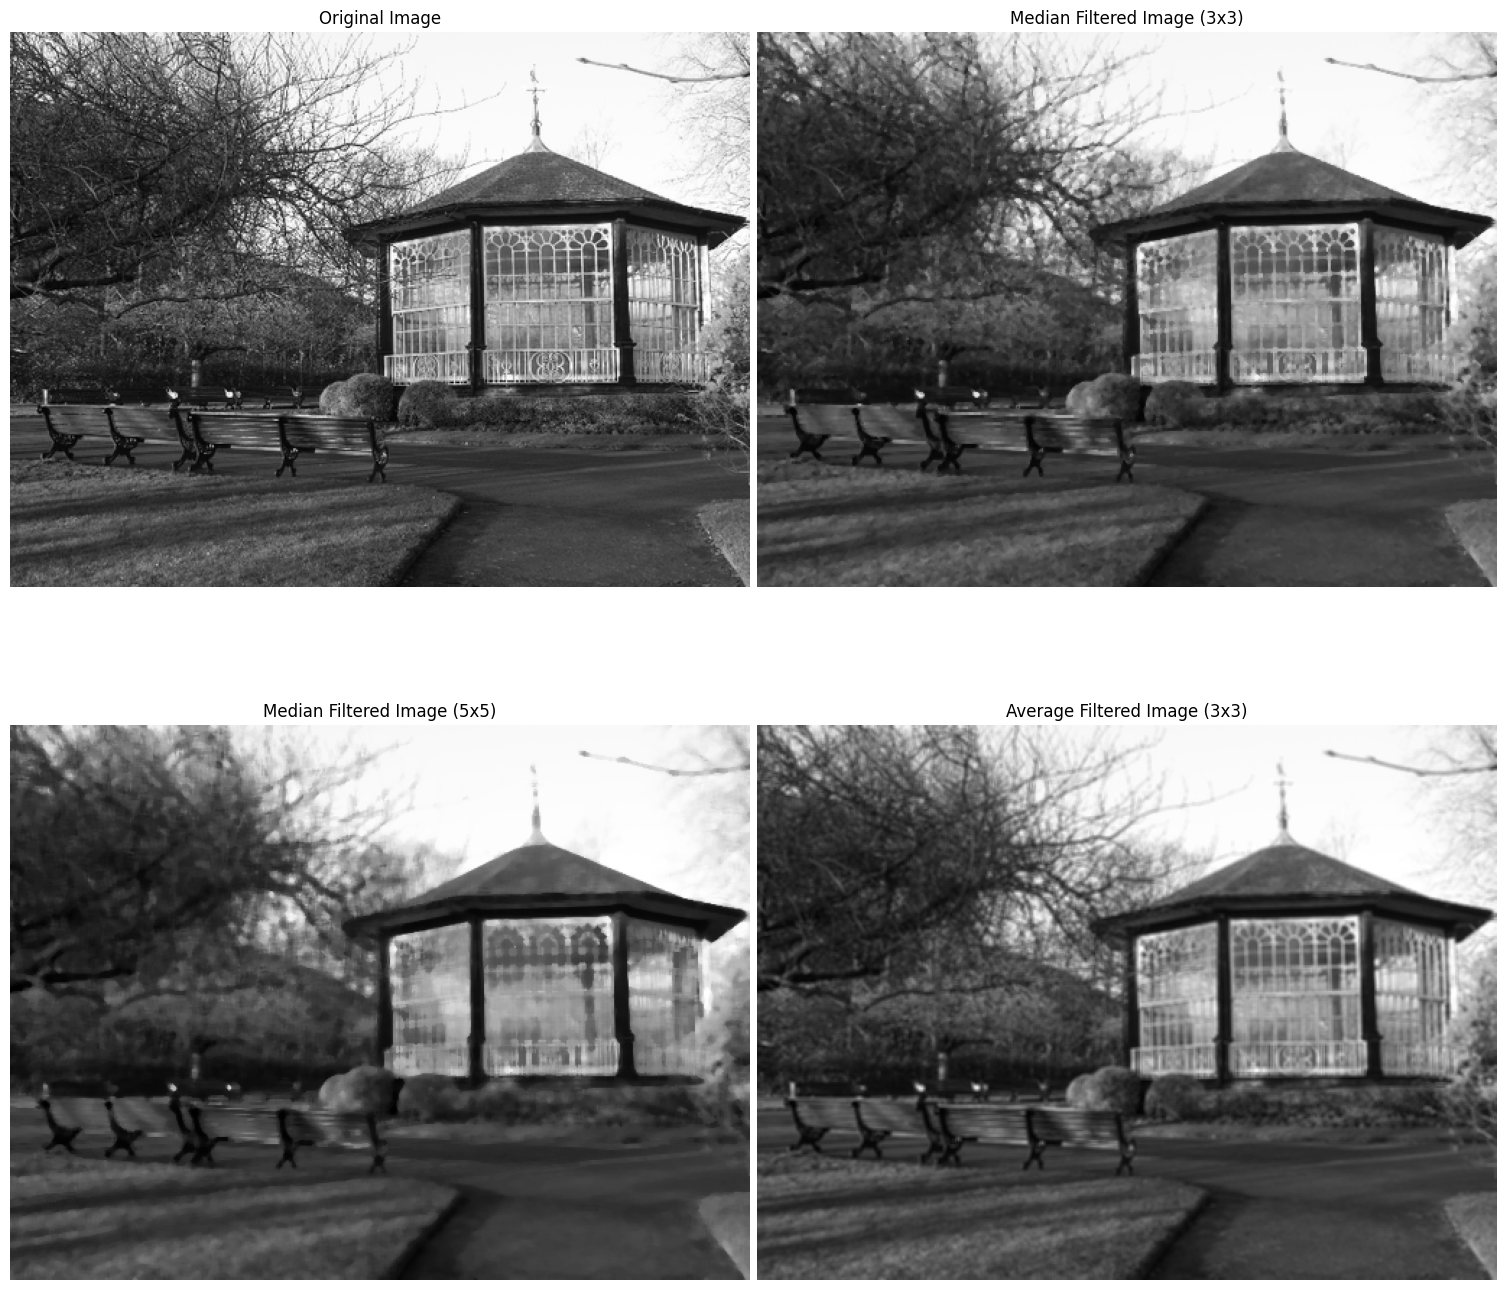

In [19]:
# Displaying Multiple Versions of a Sample Image
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].imshow(ucid_images[5], cmap='gray')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(median_filtered_images_3[5], cmap='gray')
axs[0, 1].set_title('Median Filtered Image (3x3)')

axs[1, 0].imshow(median_filtered_images_5[5], cmap='gray')
axs[1, 0].set_title('Median Filtered Image (5x5)')

axs[1, 1].imshow(average_filtered_images_3[5], cmap='gray')
axs[1, 1].set_title('Average Filtered Image (3x3)')

# Remove Axis
for ax in axs.flat:
    ax.axis('off')
    
# Gap in first row and second row
plt.tight_layout(pad=0.5)
    
plt.show()

### **Implementing LDD (Local Difference Descriptor) Features**

#### **1. Joint Histogram of Rotation Invariant Uniform LBP**

In [20]:
ucid_images.shape

(1338, 384, 512)

**Function to get Joint Histogram of Rotation Invariant Uniform LBP**

In [21]:
# Function to calculate Average value of |G_p - G_c| where c is the center pixel and p is the neighbour pixel
def get_average_difference(img):
    
    c = 0
    cnt = 0
    
    # Neighbours
    dx = [-1, -1, -1, 0, 0, 1, 1, 1]
    dy = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            
            p = img[i][j]
            
            for k in range(8):
                x = i + dx[k]
                y = j + dy[k]            
                cnt += 1
                c += abs(int(p) - int(img[x][y]))

    return c/cnt


# Function to get rotationally invariant string for a given binary string
def rotational_invariant(binary_string):
    
    # Get all possible rotations
    rotations = []
    for i in range(len(binary_string)):
        rotations.append(binary_string[i:] + binary_string[:i])
    
    # Sort the rotations
    rotations.sort()
    
    # Return the first rotation
    return rotations[0]



# Function to get joint histogram of rotationally invariant uniform lbp
def get_joint_histogram(img):
    
    dx = [-1, -1, -1, 0, 0, 1, 1, 1]
    dy = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    # BINS
    pattern_to_index = {
        "00000000": 0,
        "00000001": 1,
        "00000011": 2,
        "00000111": 3,
        "00001111": 4,
        "00011111": 5,
        "00111111": 6,
        "01111111": 7,
        "11111111": 8,
        "OTHER": 9
    }

    # HISTOGRAM
    joint_histogram = np.zeros((10, 10))
    
    # Calculate Average value of |G_p - G_c| where c is the center pixel and p is the neighbour pixel
    c = get_average_difference(img)
    
    # Calculate CLBPS and CLBPM for each pixel
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            
            # Get CLBPS and CLBPM for this pixel
            clbps = ""
            clbpm = ""
            for k in range(8):
                x = i + dx[k]
                y = j + dy[k]
                    
                if img[x][y] > img[i][j]:
                    clbps += "1"
                else:
                    clbps += "0"
                
                if abs(int(img[x][y]) - int(img[i][j])) > c:
                    clbpm += "1"
                else:
                    clbpm += "0"
            
            # Convert till rotationally invariant
            clbps = rotational_invariant(clbps)
            clbpm = rotational_invariant(clbpm)
            
            # Check Number of 0-1 and 1-0 transitions
            transitions_clbps = 0
            transitions_clbpm = 0
            for k in range(1, len(clbps)):
                if clbps[k] != clbps[k-1]:
                    transitions_clbps += 1
                if clbpm[k] != clbpm[k-1]:
                    transitions_clbpm += 1

            if transitions_clbps > 2:
                # P+1 ROTATION INVARIANT FORM
                clbps = "00001001"
            if transitions_clbpm > 2:
                # P+1 ROTATION INVARIANT FORM                
                clbpm = "00001001"
            
            if clbps not in pattern_to_index:
                clbps = "OTHER"
            
            if clbpm not in pattern_to_index:
                clbpm = "OTHER"
            
            # Update Joint Histogram
            joint_histogram[pattern_to_index[clbps]][pattern_to_index[clbpm]] += 1
    
    # Convert to Numpy Array
    joint_histogram = np.array(joint_histogram)
    
    # Return Joint Histogram
    return joint_histogram

In [22]:
# Try for a sample image
joint_histogram = get_joint_histogram(ucid_images[5])

In [23]:
joint_histogram.shape

(10, 10)

In [24]:
# Function to calculate Joint Histogram for all images
def calculate_joint_histograms(images, TARGET_LIST, DATASET_NAME="DEFAULT"):
    for i in range(len(images)):
        if i%100 == 0:
            print(f"{i}/1338 images done for {DATASET_NAME}")
        TARGET_LIST.append(get_joint_histogram(images[i]))

In [25]:
# Calculate Joint Histogram for all images
joint_histograms_ucid = []
joint_histograms_median_filtered_3 = []
joint_histograms_median_filtered_5 = []
joint_histograms_average_filtered_3 = []

In [26]:
# RUN FOR EVERY DATASET IN A SEPARATE THREAD
t1 = threading.Thread(target=lambda: calculate_joint_histograms(ucid_images, joint_histograms_ucid, "UCID"))
t2 = threading.Thread(target=lambda: calculate_joint_histograms(median_filtered_images_3, joint_histograms_median_filtered_3, "MEDIAN_FILTERED_3"))
t3 = threading.Thread(target=lambda: calculate_joint_histograms(median_filtered_images_5, joint_histograms_median_filtered_5, "MEDIAN_FILTERED_5"))
t4 = threading.Thread(target=lambda: calculate_joint_histograms(average_filtered_images_3, joint_histograms_average_filtered_3, "AVERAGE_FILTERED_3"))

In [28]:
# START ALL THREADS
t1.start()
t2.start()
t3.start()
t4.start()

# WAIT FOR ALL THREADS TO COMPLETE
t1.join()
t2.join()
t3.join()
t4.join()

0/1338 images done for UCID
0/1338 images done for MEDIAN_FILTERED_3
0/1338 images done for MEDIAN_FILTERED_5
0/1338 images done for AVERAGE_FILTERED_3
100/1338 images done for MEDIAN_FILTERED_3
100/1338 images done for UCID
100/1338 images done for MEDIAN_FILTERED_5
100/1338 images done for AVERAGE_FILTERED_3
200/1338 images done for MEDIAN_FILTERED_3
200/1338 images done for UCID
200/1338 images done for MEDIAN_FILTERED_5
200/1338 images done for AVERAGE_FILTERED_3
300/1338 images done for MEDIAN_FILTERED_3
300/1338 images done for UCID
300/1338 images done for MEDIAN_FILTERED_5
300/1338 images done for AVERAGE_FILTERED_3
400/1338 images done for UCID
400/1338 images done for MEDIAN_FILTERED_3
400/1338 images done for MEDIAN_FILTERED_5
400/1338 images done for AVERAGE_FILTERED_3
500/1338 images done for UCID
500/1338 images done for MEDIAN_FILTERED_3
500/1338 images done for MEDIAN_FILTERED_5
500/1338 images done for AVERAGE_FILTERED_3
600/1338 images done for UCID
600/1338 images do

In [29]:
# Convert to Numpy Arrays
joint_histograms_ucid = np.array(joint_histograms_ucid)
joint_histograms_median_filtered_3 = np.array(joint_histograms_median_filtered_3)
joint_histograms_median_filtered_5 = np.array(joint_histograms_median_filtered_5)
joint_histograms_average_filtered_3 = np.array(joint_histograms_average_filtered_3)

In [28]:
joint_histograms_ucid.shape, joint_histograms_median_filtered_3.shape, joint_histograms_median_filtered_5.shape, joint_histograms_average_filtered_3.shape

((1338, 10, 10), (1338, 10, 10), (1338, 10, 10), (1338, 10, 10))

In [31]:
# Save Joint Histograms
# np.save("joint_histograms_ucid.npy", joint_histograms_ucid)
# np.save("joint_histograms_median_filtered_3.npy", joint_histograms_median_filtered_3)
# np.save("joint_histograms_median_filtered_5.npy", joint_histograms_median_filtered_5)
# np.save("joint_histograms_average_filtered_3.npy", joint_histograms_average_filtered_3)

In [7]:
# Read Joint Histograms
# joint_histograms_ucid = np.load("joint_histograms_ucid.npy")
# joint_histograms_median_filtered_3 = np.load("joint_histograms_median_filtered_3.npy")
# joint_histograms_median_filtered_5 = np.load("joint_histograms_median_filtered_5.npy")
# joint_histograms_average_filtered_3 = np.load("joint_histograms_average_filtered_3.npy")

In [8]:
joint_histograms_ucid.shape, joint_histograms_median_filtered_3.shape, joint_histograms_median_filtered_5.shape, joint_histograms_average_filtered_3.shape

((1338, 10, 10), (1338, 10, 10), (1338, 10, 10), (1338, 10, 10))

So now for every image, we have a feature vector of size 100.

#### **2. Correlation Coefficients of PDM**

In [30]:
ucid_images.shape

(1338, 384, 512)

**Function to get PDM (Pixel Difference Matrix) from an Image**

In [31]:
# Function to calculate PDM of an Image
def calculate_pdm(img):
    
    # Calculate PDV's for all pixels
    pdm = []
    
    # Neighbours
    dx = [-1, -1, -1, 0, 0, 1, 1, 1]
    dy = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    # Loop over all pixels
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1]-1):
            
            pdv = []
            
            # Flag to check if all elements are 0
            flag = False
            
            # Check for all 8 neighbours of the pixel
            for k in range(8):
                difference = int(img[i + dx[k]][j + dy[k]]) - int(img[i][j])
                pdv.append(difference)
                if difference != 0:
                    flag = True

            # If all elements are 0, then don't add it to the list
            if flag:
                pdm.append(pdv)
    
    
    pdm = np.array(pdm)
    # Take Transpose
    pdm = pdm.T
    
    return pdm

**Function to get Correlation Coefficients of PDM from an Image**

In [32]:
# UTILS
def get_D(pdm_row):
    return np.cov(pdm_row, pdm_row)[0][1]

# Function to get Correlation Coefficients of PDM from an Image
def get_correlation_coefficients(img):
    
    # Calculate PDM
    pdm = calculate_pdm(img)
    
    # Calculate Correlation Coefficients
    corr_coefficients = []
    
    for i in range(pdm.shape[0]):
        for j in range(i+1, pdm.shape[0]):
            # Calculate Correlation Coefficient
            D1 = get_D(pdm[i])
            D2 = get_D(pdm[j])
            corr = np.cov(pdm[i], pdm[j])[0][1] / np.sqrt(D1 * D2)
            corr_coefficients.append(corr)
    
    return np.array(corr_coefficients)

In [33]:
# Calculating PDM of a Sample Image
calculate_pdm(ucid_images[0]).shape

(8, 186657)

In [34]:
# Calculating Correlation Coefficients of a Sample Image
get_correlation_coefficients(ucid_images[0]).shape

(28,)

In [35]:
# Calculating Correlation Coefficients of all Images
ucid_images_corr_coefficients = []
median_filtered_images_3_corr_coefficients = []
median_filtered_images_5_corr_coefficients = []
average_filtered_images_3_corr_coefficients = []

print("UCID IMAGES")
for img in ucid_images:
    ucid_images_corr_coefficients.append(get_correlation_coefficients(img))
    
print("MEDIAN FILTERED IMAGES (3x3)")
for img in median_filtered_images_3:
    median_filtered_images_3_corr_coefficients.append(get_correlation_coefficients(img))
    
print("MEDIAN FILTERED IMAGES (5x5)")
for img in median_filtered_images_5:
    median_filtered_images_5_corr_coefficients.append(get_correlation_coefficients(img))
    
print("AVERAGE FILTERED IMAGES (3x3)")
for img in average_filtered_images_3:
    average_filtered_images_3_corr_coefficients.append(get_correlation_coefficients(img))

UCID IMAGES
MEDIAN FILTERED IMAGES (3x3)
MEDIAN FILTERED IMAGES (5x5)
AVERAGE FILTERED IMAGES (3x3)


In [37]:
# Converting to Numpy Arrays
ucid_images_corr_coefficients = np.array(ucid_images_corr_coefficients)
median_filtered_images_3_corr_coefficients = np.array(median_filtered_images_3_corr_coefficients)
median_filtered_images_5_corr_coefficients = np.array(median_filtered_images_5_corr_coefficients)
average_filtered_images_3_corr_coefficients = np.array(average_filtered_images_3_corr_coefficients)

In [38]:
ucid_images_corr_coefficients.shape, median_filtered_images_3_corr_coefficients.shape, median_filtered_images_5_corr_coefficients.shape, average_filtered_images_3_corr_coefficients.shape

((1338, 28), (1338, 28), (1338, 28), (1338, 28))

In [40]:
# import pickle

# # Save using Pickle
# with open('ucid_images_corr_coefficients.pkl', 'wb') as f:
#     pickle.dump(ucid_images_corr_coefficients, f)

# with open('median_filtered_images_3_corr_coefficients.pkl', 'wb') as f:
#     pickle.dump(median_filtered_images_3_corr_coefficients, f)

# with open('median_filtered_images_5_corr_coefficients.pkl', 'wb') as f:
#     pickle.dump(median_filtered_images_5_corr_coefficients, f)

# with open('average_filtered_images_3_corr_coefficients.pkl', 'wb') as f:
#     pickle.dump(average_filtered_images_3_corr_coefficients, f)

In [9]:
# import pickle

# # Load using Pickle
# with open('ucid_images_corr_coefficients.pkl', 'rb') as f:
#     ucid_images_corr_coefficients = pickle.load(f)

# with open('median_filtered_images_3_corr_coefficients.pkl', 'rb') as f:
#     median_filtered_images_3_corr_coefficients = pickle.load(f)

# with open('median_filtered_images_5_corr_coefficients.pkl', 'rb') as f:
#     median_filtered_images_5_corr_coefficients = pickle.load(f)

# with open('average_filtered_images_3_corr_coefficients.pkl', 'rb') as f:
#     average_filtered_images_3_corr_coefficients = pickle.load(f)

In [10]:
# Shapes
ucid_images_corr_coefficients.shape, median_filtered_images_3_corr_coefficients.shape, median_filtered_images_5_corr_coefficients.shape, average_filtered_images_3_corr_coefficients.shape

((1338, 28), (1338, 28), (1338, 28), (1338, 28))

So now for every image, we have a feature vector of size 28.

#### **Recreating Plots....**

##### **a.) Fig 3.** 

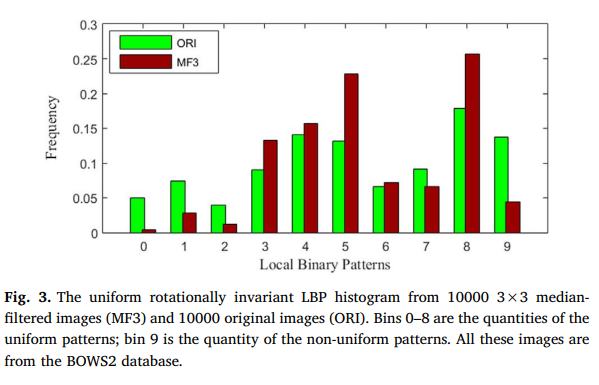

We have the UCID Dataset rather than BOWS2 Dataset. And we have 1338 images rather than 10,000 images. 

Let us plot the same thing and see if the pattern is similar.

In [37]:
joint_histograms_ucid.shape

(1338, 10, 10)

In [38]:
joint_histograms_median_filtered_3.shape

(1338, 10, 10)

In [39]:
# Creating 1-D histograms for CLBPS and UCID Images
ucid_images_corr_coefficients_1d = []
median_filtered_images_3_corr_coefficients_1d = []

# Loop over all bins
for i in range(10):
    
    bin_value_ori = 0
    bin_value_med_3 = 0
    
    # Loop over all images
    for j in range(1338):
        # Summation of the elements of ith row of jth histogram
        bin_value_ori += np.sum(joint_histograms_ucid[j][i])
        bin_value_med_3 += np.sum(joint_histograms_median_filtered_3[j][i])
    
    # Append to list
    ucid_images_corr_coefficients_1d.append(bin_value_ori)
    median_filtered_images_3_corr_coefficients_1d.append(bin_value_med_3)

In [40]:
# Converting to Numpy Arrays
ucid_images_corr_coefficients_1d = np.array(ucid_images_corr_coefficients_1d)
median_filtered_images_3_corr_coefficients_1d = np.array(median_filtered_images_3_corr_coefficients_1d)

In [41]:
ucid_images_corr_coefficients_1d.shape, median_filtered_images_3_corr_coefficients_1d.shape

((10,), (10,))

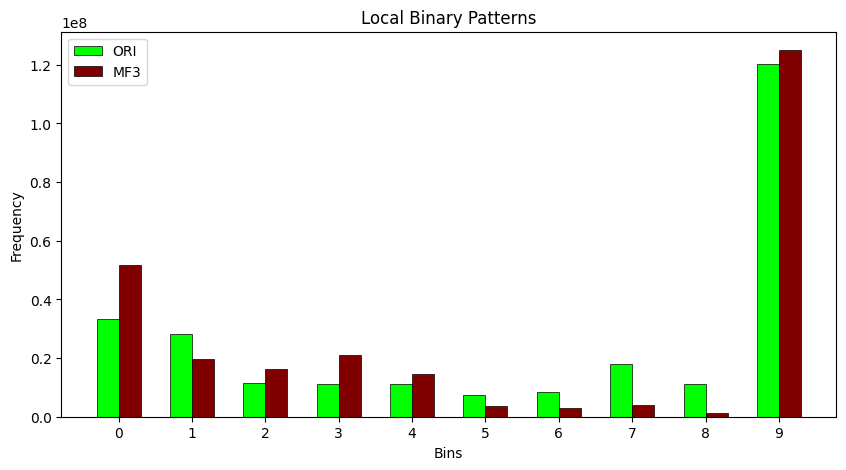

In [42]:
# Plotting 1-D Histograms
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), ucid_images_corr_coefficients_1d, width=0.3, label="ORI", color="lime", edgecolor="black", linewidth=0.5)
plt.bar(np.arange(10)+0.3, median_filtered_images_3_corr_coefficients_1d, width=0.3, label="MF3", color="maroon", edgecolor="black", linewidth=0.5)
plt.xticks(np.arange(10)+0.15, np.arange(10))
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Local Binary Patterns")
plt.legend()
plt.show()

Above we can see that we see the same pattern in the following bins:

-- Bin #1

-- Bin #3

-- Bin #4

And different pattern in rest of the bins.

##### **b.) Fig 4.** 

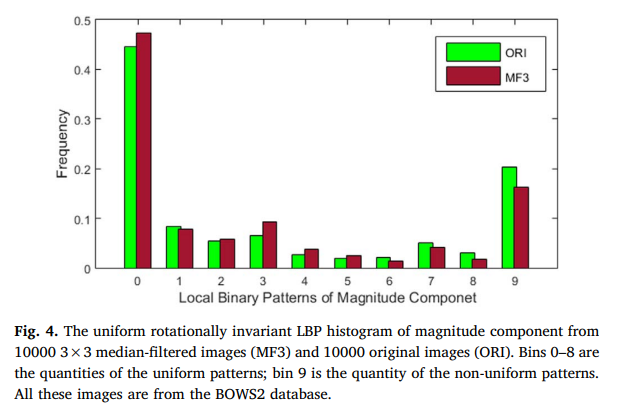

In [43]:
# Creating 1-D histograms for CLBPM and UCID Images
ucid_images_corr_coefficients_1d = []
median_filtered_images_3_corr_coefficients_1d = []

# Loop over all bins
for i in range(10):
    
    bin_value_ori = 0
    bin_value_med_3 = 0
    
    # Loop over all images
    for j in range(1338):
        
        # Summation of the elements of ith column of jth histogram
        bin_value_ori += np.sum(joint_histograms_ucid[j][:, i])
        bin_value_med_3 += np.sum(joint_histograms_median_filtered_3[j][:, i])
    
    # Append to list
    ucid_images_corr_coefficients_1d.append(bin_value_ori)
    median_filtered_images_3_corr_coefficients_1d.append(bin_value_med_3)

In [44]:
# Converting to Numpy Arrays
ucid_images_corr_coefficients_1d = np.array(ucid_images_corr_coefficients_1d)
median_filtered_images_3_corr_coefficients_1d = np.array(median_filtered_images_3_corr_coefficients_1d)

In [45]:
ucid_images_corr_coefficients_1d.shape, median_filtered_images_3_corr_coefficients_1d.shape

((10,), (10,))

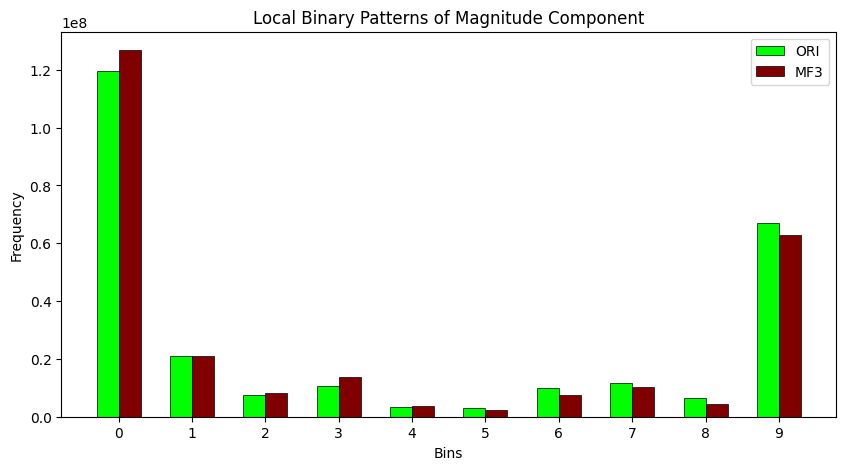

In [46]:
# Plotting 1-D Histograms
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), ucid_images_corr_coefficients_1d, width=0.3, label="ORI", color="lime", edgecolor="black", linewidth=0.5)
plt.bar(np.arange(10)+0.3, median_filtered_images_3_corr_coefficients_1d, width=0.3, label="MF3", color="maroon", edgecolor="black", linewidth=0.5)
plt.xticks(np.arange(10)+0.15, np.arange(10))
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Local Binary Patterns of Magnitude Component")
plt.legend()
plt.show()

Above we see the same pattern in all the bins.

#### **3. Creating the LDD Feature Set**

In [11]:
# Creating the LDD Features
joint_histograms_ucid.shape, joint_histograms_median_filtered_3.shape, joint_histograms_median_filtered_5.shape, joint_histograms_average_filtered_3.shape

((1338, 10, 10), (1338, 10, 10), (1338, 10, 10), (1338, 10, 10))

In [12]:
ucid_images_corr_coefficients.shape, median_filtered_images_3_corr_coefficients.shape, median_filtered_images_5_corr_coefficients.shape, average_filtered_images_3_corr_coefficients.shape

((1338, 28), (1338, 28), (1338, 28), (1338, 28))

In [13]:
# Flattening the 2-D histogram features
histogram_features_ucid = []
histogram_features_median_filtered_3 = []
histogram_features_median_filtered_5 = []
histogram_features_average_filtered_3 = []

for i in range(1338):
    histogram_features_ucid.append(joint_histograms_ucid[i].flatten())
    histogram_features_median_filtered_3.append(joint_histograms_median_filtered_3[i].flatten())
    histogram_features_median_filtered_5.append(joint_histograms_median_filtered_5[i].flatten())
    histogram_features_average_filtered_3.append(joint_histograms_average_filtered_3[i].flatten())

In [14]:
# Converting to Numpy Arrays
histogram_features_ucid = np.array(histogram_features_ucid)
histogram_features_median_filtered_3 = np.array(histogram_features_median_filtered_3)
histogram_features_median_filtered_5 = np.array(histogram_features_median_filtered_5)
histogram_features_average_filtered_3 = np.array(histogram_features_average_filtered_3)

In [20]:
histogram_features_ucid.shape, histogram_features_median_filtered_3.shape, histogram_features_median_filtered_5.shape, histogram_features_average_filtered_3.shape

((1338, 100), (1338, 100), (1338, 100), (1338, 100))

In [21]:
# # Save the Histogram Features
# np.save("histogram_features_ucid.npy", histogram_features_ucid)
# np.save("histogram_features_median_filtered_3.npy", histogram_features_median_filtered_3)
# np.save("histogram_features_median_filtered_5.npy", histogram_features_median_filtered_5)
# np.save("histogram_features_average_filtered_3.npy", histogram_features_average_filtered_3)

In [22]:
# # Load the Histogram Features
# histogram_features_ucid = np.load("histogram_features_ucid.npy")
# histogram_features_median_filtered_3 = np.load("histogram_features_median_filtered_3.npy")
# histogram_features_median_filtered_5 = np.load("histogram_features_median_filtered_5.npy")
# histogram_features_average_filtered_3 = np.load("histogram_features_average_filtered_3.npy")

In [23]:
histogram_features_ucid.shape, histogram_features_median_filtered_3.shape, histogram_features_median_filtered_5.shape, histogram_features_average_filtered_3.shape

((1338, 100), (1338, 100), (1338, 100), (1338, 100))

Merging both sets of features into a single feature set.


In [52]:
# Creating the LDD Features
ldd_features_ucid = []
ldd_features_median_filtered_3 = []
ldd_features_median_filtered_5 = []
ldd_features_average_filtered_3 = []

for i in range(1338):
    ldd_features_ucid.append(np.concatenate((histogram_features_ucid[i], ucid_images_corr_coefficients[i]), axis=0))
    ldd_features_median_filtered_3.append(np.concatenate((histogram_features_median_filtered_3[i], median_filtered_images_3_corr_coefficients[i]), axis=0))
    ldd_features_median_filtered_5.append(np.concatenate((histogram_features_median_filtered_5[i], median_filtered_images_5_corr_coefficients[i]), axis=0))
    ldd_features_average_filtered_3.append(np.concatenate((histogram_features_average_filtered_3[i], average_filtered_images_3_corr_coefficients[i]), axis=0))

In [53]:
# Converting to Numpy Arrays
ldd_features_ucid = np.array(ldd_features_ucid)
ldd_features_median_filtered_3 = np.array(ldd_features_median_filtered_3)
ldd_features_median_filtered_5 = np.array(ldd_features_median_filtered_5)
ldd_features_average_filtered_3 = np.array(ldd_features_average_filtered_3)

In [54]:
ldd_features_ucid.shape, ldd_features_median_filtered_3.shape, ldd_features_median_filtered_5.shape, ldd_features_average_filtered_3.shape

((1338, 128), (1338, 128), (1338, 128), (1338, 128))

In [55]:
# Saving the LDD Features
# np.save("ucid_ldd_features.npy", ldd_features_ucid)
# np.save("median_filtered_3_ldd_features.npy", ldd_features_median_filtered_3)
# np.save("median_filtered_5_ldd_features.npy", ldd_features_median_filtered_5)
# np.save("average_filtered_3_ldd_features.npy", ldd_features_average_filtered_3)

In [24]:
# Loading the LDD Features
# ldd_features_ucid = np.load("ucid_ldd_features.npy")
# ldd_features_median_filtered_3 = np.load("median_filtered_3_ldd_features.npy")
# ldd_features_median_filtered_5 = np.load("median_filtered_5_ldd_features.npy")
# ldd_features_average_filtered_3 = np.load("average_filtered_3_ldd_features.npy")

In [25]:
ldd_features_ucid.shape, ldd_features_median_filtered_3.shape, ldd_features_median_filtered_5.shape, ldd_features_average_filtered_3.shape

((1338, 128), (1338, 128), (1338, 128), (1338, 128))

#### **Recreating Plots....**

##### **c.) Fig 7.**

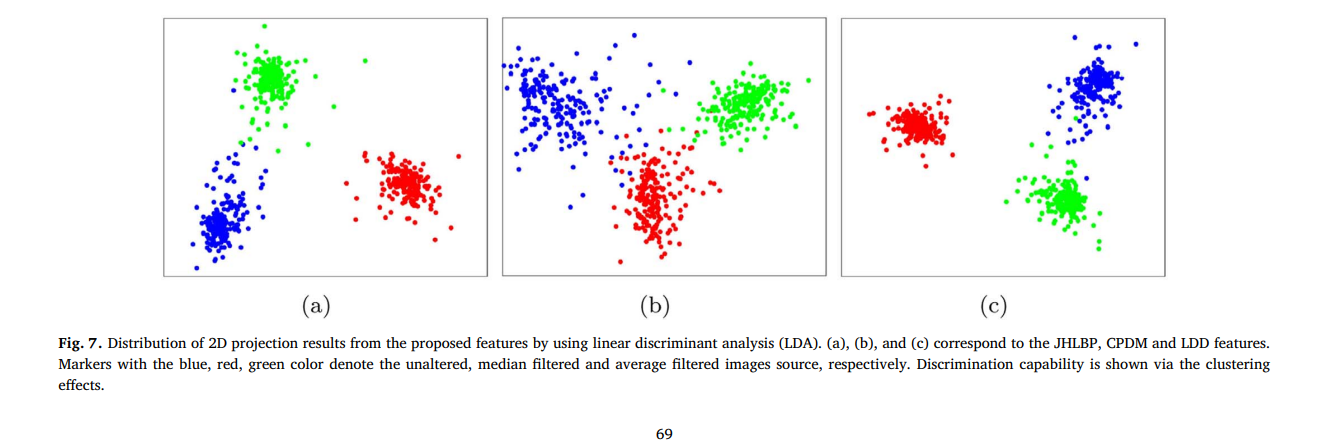

In [4]:
# JHLBP Features Dataset
X_JHLBP = []
y_JHLBP = []

# CPDM Features Dataset
X_CPDM = []
y_CPDM = []

# LDD Features Dataset
X_LDD = []
y_LDD = []

In [26]:
histogram_features_ucid.shape, histogram_features_median_filtered_3.shape, histogram_features_median_filtered_5.shape, histogram_features_average_filtered_3.shape

((1338, 100), (1338, 100), (1338, 100), (1338, 100))

In [27]:
ucid_images_corr_coefficients.shape, median_filtered_images_3_corr_coefficients.shape, median_filtered_images_5_corr_coefficients.shape, average_filtered_images_3_corr_coefficients.shape

((1338, 28), (1338, 28), (1338, 28), (1338, 28))

In [28]:
ldd_features_ucid.shape, ldd_features_median_filtered_3.shape, ldd_features_median_filtered_5.shape, ldd_features_average_filtered_3.shape

((1338, 128), (1338, 128), (1338, 128), (1338, 128))

In [29]:
# Creating Datasets
for i in range(1338):
    
    # JHLBP Features Dataset
    X_JHLBP.append(histogram_features_ucid[i])
    X_JHLBP.append(histogram_features_median_filtered_3[i])
    X_JHLBP.append(histogram_features_median_filtered_5[i])
    X_JHLBP.append(histogram_features_average_filtered_3[i])
    y_JHLBP.append("blue")
    y_JHLBP.append("red")
    y_JHLBP.append("yellow")
    y_JHLBP.append("green")
    
    # CPDM Features Dataset
    X_CPDM.append(ucid_images_corr_coefficients[i])
    X_CPDM.append(median_filtered_images_3_corr_coefficients[i])
    X_CPDM.append(median_filtered_images_5_corr_coefficients[i])
    X_CPDM.append(average_filtered_images_3_corr_coefficients[i])
    y_CPDM.append("blue")
    y_CPDM.append("red")
    y_CPDM.append("yellow")
    y_CPDM.append("green")
    
    # LDD Features Dataset
    X_LDD.append(ldd_features_ucid[i])
    X_LDD.append(ldd_features_median_filtered_3[i])
    X_LDD.append(ldd_features_median_filtered_5[i])
    X_LDD.append(ldd_features_average_filtered_3[i])
    y_LDD.append("blue")
    y_LDD.append("red")
    y_LDD.append("yellow")
    y_LDD.append("green")

In [30]:
# Converting to Numpy Arrays

X_JHLBP = np.array(X_JHLBP)
X_CPDM = np.array(X_CPDM)
X_LDD = np.array(X_LDD)

y_JHLBP = np.array(y_JHLBP)
y_CPDM = np.array(y_CPDM)
y_LDD = np.array(y_LDD)

In [31]:
X_JHLBP.shape, y_JHLBP.shape, X_CPDM.shape, y_CPDM.shape, X_LDD.shape, y_LDD.shape

((5352, 100), (5352,), (5352, 28), (5352,), (5352, 128), (5352,))

In [32]:
# Save the Datasets
# np.save("X_JHLBP.npy", X_JHLBP)
# np.save("y_JHLBP.npy", y_JHLBP)
# np.save("X_CPDM.npy", X_CPDM)
# np.save("y_CPDM.npy", y_CPDM)
# np.save("X_LDD.npy", X_LDD)
# np.save("y_LDD.npy", y_LDD)

In [2]:
# # Load the Datasets
X_JHLBP = np.load("X_JHLBP.npy")
y_JHLBP = np.load("y_JHLBP.npy")
X_CPDM = np.load("X_CPDM.npy")
y_CPDM = np.load("y_CPDM.npy")
X_LDD = np.load("X_LDD.npy")
y_LDD = np.load("y_LDD.npy")

In [3]:
X_JHLBP.shape, y_JHLBP.shape, X_CPDM.shape, y_CPDM.shape, X_LDD.shape, y_LDD.shape

((5352, 100), (5352,), (5352, 28), (5352,), (5352, 128), (5352,))

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the Datasets
scaler = MinMaxScaler()

X_JHLBP_Scaled = scaler.fit_transform(X_JHLBP)
X_CPDM_Scaled = scaler.fit_transform(X_CPDM)
X_LDD_Scaled = scaler.fit_transform(X_LDD)

In [6]:
X_JHLBP_Scaled.shape, X_CPDM_Scaled.shape, X_LDD_Scaled.shape

((5352, 100), (5352, 28), (5352, 128))

In [7]:
# LDA using JHLBP Features
lda = LinearDiscriminantAnalysis(n_components=2)

# Fitting the LDA
new_X_JHLBP = lda.fit_transform(X_JHLBP_Scaled, y_JHLBP)
new_X_CPDM = lda.fit_transform(X_CPDM_Scaled, y_CPDM)
new_X_LDD = lda.fit_transform(X_LDD_Scaled, y_LDD)

In [8]:
new_X_JHLBP.shape, new_X_CPDM.shape, new_X_LDD.shape

((5352, 2), (5352, 2), (5352, 2))

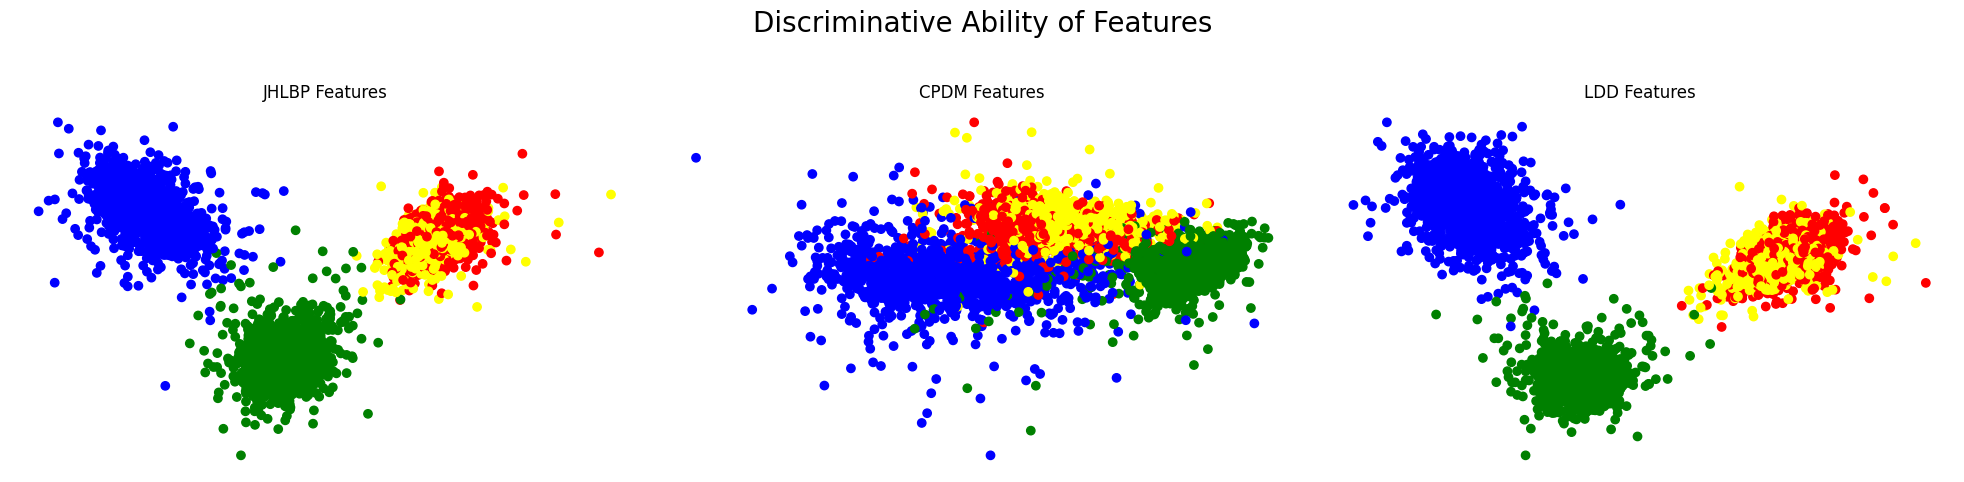

In [9]:
# Plotting the LDAs in 3 Subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the JHLBP LDA
ax1.scatter(new_X_JHLBP[:, 0], new_X_JHLBP[:, 1], c=y_JHLBP)
ax1.set_title("JHLBP Features")
# axis off
ax1.axis('off')
# Border around the plot
ax1.set_frame_on(True)


# Plotting the CPDM LDA
ax2.scatter(new_X_CPDM[:, 0], new_X_CPDM[:, 1], c=y_CPDM)
ax2.set_title("CPDM Features")
# axis off
ax2.axis('off')
# Box around the plot
ax2.set_frame_on(True)

# Plotting the LDD LDA
ax3.scatter(new_X_LDD[:, 0], new_X_LDD[:, 1], c=y_LDD)
ax3.set_title("LDD Features")
# axis off
ax3.axis('off')
# Box around the plot
ax3.set_frame_on(True)

# Title of Figure
fig.suptitle("Discriminative Ability of Features", fontsize=20)
# MArgin below the title
fig.tight_layout(pad=2.0)

plt.show()

$Blue$ refers to Unaltered Images

$Red$ refers to Images with Median filtering applied with a kernel size 3x3

$Yellow$ refers to Images with Median filtering applied with a kernel size 5x5

$Green$ refers to Images with Average filtering applied with a kernel size 3x3

The Discriminative ability is shown via Clustering Effect.

We see the same pattern as shown in the research paper i.e. LDD provides better discriminative ability than the other two methods.

JHLBP provides better discriminative ability than CPDM which has very low discriminative ability.

**NOTE:** We see MF3 and MF5 are a bit merged, but the median filtering as a whole is separated than the original images and the average filtered images.

### **Experiments and Results**

The $C-SVM$ with $Gaussian$ $Kernel$ is used as the classifier in our experiments. Using the **five-fold cross-validation** in conjunction with a grid search, we obtain the best kernel parameters for the $SVM$. The grid search for the optimal parameters are performed on the multiplicative grid $(C, \gamma) \in \{ (2^i, 2^j) | i, j \in Z \}$.

We use those optimal parameters to get the classifier model on the entire training set, and the trained classifier model is used to perform a classification on the testing set.

Specifically, the images in the $UCID$ database are randomly divided into four folds of nearly equal size. The training set is composed of three folds, while the remaining fold is used for evaluation.

The performance of each detection method is summarized by the minimal average decision error of each technique under the assumption of equal priors and equal costs, 

$$P_e = min \left\{ \dfrac{P_{fp} + 1 - P_{tp}}{2} \right\}$$

where $P_{fp}$ and $P_{tp}$ denote the false positive and true positive rates, respectively.

In [10]:
X_JHLBP.shape, y_JHLBP.shape, X_CPDM.shape, y_CPDM.shape, X_LDD.shape, y_LDD.shape

((5352, 100), (5352,), (5352, 28), (5352,), (5352, 128), (5352,))

#### **C-SVM with Gaussian Kernel**

In [11]:
# Importing the Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [12]:
# Creating the C-SVM Classifier
svc_jhlbp = SVC(kernel='rbf')
svc_cpdm = SVC(kernel='rbf')
svc_ldd = SVC(kernel='rbf')

In [13]:
# Creating the Grid Search Parameters
parameters = {'C': [0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
# Used in Paper
parameters_2 = {'C': [2**i for i in range(-5, 16)], 'gamma': [2**i for i in range(-15, 4)]}

In [14]:
# Creating the Grid Search
clf_jhlbp = GridSearchCV(svc_jhlbp, parameters, cv=5, n_jobs=-1, refit=True)
clf_cpdm = GridSearchCV(svc_cpdm, parameters, cv=5, n_jobs=-1, refit=True)
clf_ldd = GridSearchCV(svc_ldd, parameters, cv=5, n_jobs=-1, refit=True)

# Using original parameters
clf_jhlbp_2 = GridSearchCV(svc_jhlbp, parameters_2, cv=5, n_jobs=-1, refit=True)
clf_cpdm_2 = GridSearchCV(svc_cpdm, parameters_2, cv=5, n_jobs=-1, refit=True)
clf_ldd_2 = GridSearchCV(svc_ldd, parameters_2, cv=5, n_jobs=-1, refit=True)

**JHLBP Features**

In [15]:
# Fitting the Grid Search on the JHLBP Features and print the best parameters
clf_jhlbp.fit(X_JHLBP_Scaled, y_JHLBP)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [16]:
# Fitting the Grid Search using Original Parameters in Paper
clf_jhlbp_2.fit(X_JHLBP_Scaled, y_JHLBP)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024, 2048, 4096,
                               8192, 16384, 32768],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]})

In [20]:
# Printing the Best Parameters
print("Best Parameters for JHLBP Features using our own Params: ", clf_jhlbp.best_params_)
print("Best Parameters for JHLBP Features using Paper Params: ", clf_jhlbp_2.best_params_)

Best Parameters for JHLBP Features using our own Params:  {'C': 1000, 'gamma': 0.1}
Best Parameters for JHLBP Features using Paper Params:  {'C': 512, 'gamma': 0.125}


In [21]:
jhlbp_best_params = clf_jhlbp.best_params_
jhlbp_best_params_2 = clf_jhlbp_2.best_params_

In [67]:
# import pickle

# # Saving Best Parameters with Pickle
# with open("jhlbp_best_params.pickle", "wb") as f:
#     pickle.dump(jhlbp_best_params, f)

# with open("jhlbp_best_params_2.pickle", "wb") as f:
#     pickle.dump(jhlbp_best_params_2, f)

In [68]:
import pickle

# Loading the Best Parameters
with open("jhlbp_best_params.pickle", "rb") as f:
    jhlbp_best_params = pickle.load(f)
    
with open("jhlbp_best_params_2.pickle", "rb") as f:
    jhlbp_best_params_2 = pickle.load(f)

In [71]:
jhlbp_best_params, jhlbp_best_params_2

({'C': 1000, 'gamma': 0.1}, {'C': 512, 'gamma': 0.125})

**CPDM Features**

In [22]:
# Fitting the Grid Search on the CPDM Features and print the best parameters
clf_cpdm.fit(X_CPDM_Scaled, y_CPDM)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [23]:
# Fitting the Grid Search using Original Parameters in Paper
clf_cpdm_2.fit(X_CPDM_Scaled, y_CPDM)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024, 2048, 4096,
                               8192, 16384, 32768],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]})

In [24]:
# Printing the Best Parameters
print("Best Parameters for CPDM Features: ", clf_cpdm.best_params_)
print("Best Parameters for CPDM Features using Paper Params: ", clf_cpdm_2.best_params_)

Best Parameters for CPDM Features:  {'C': 1000, 'gamma': 1}
Best Parameters for CPDM Features using Paper Params:  {'C': 16384, 'gamma': 0.125}


In [25]:
cpdm_best_params = clf_cpdm.best_params_
cpdm_best_params_2 = clf_cpdm_2.best_params_

In [74]:
# import pickle

# # Saving Best Parameters with Pickle
# with open("cpdm_best_params.pickle", "wb") as f:
#     pickle.dump(cpdm_best_params, f)

# with open("cpdm_best_params_2.pickle", "wb") as f:
#     pickle.dump(cpdm_best_params_2, f)

In [73]:
import pickle

# Loading the Best Parameters
with open("cpdm_best_params.pickle", "rb") as f:
    cpdm_best_params = pickle.load(f)
    
with open("cpdm_best_params_2.pickle", "rb") as f:
    cpdm_best_params_2 = pickle.load(f)

In [75]:
cpdm_best_params, cpdm_best_params_2

({'C': 1000, 'gamma': 1}, {'C': 16384, 'gamma': 0.125})

**LDD Features**

In [17]:
# Fitting the Grid Search on the LDD Features and print the best parameters
clf_ldd.fit(X_LDD_Scaled, y_LDD)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [18]:
# Fitting the Grid Search using Original Parameters in Paper
clf_ldd_2.fit(X_LDD_Scaled, y_LDD)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128, 256, 512, 1024, 2048, 4096,
                               8192, 16384, 32768],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]})

In [26]:
# Printing the Best Parameters
print("Best Parameters for LDD Features: ", clf_ldd.best_params_)
print("Best Parameters for LDD Features using Paper Params: ", clf_ldd_2.best_params_)

Best Parameters for LDD Features:  {'C': 1000, 'gamma': 0.1}
Best Parameters for LDD Features using Paper Params:  {'C': 1024, 'gamma': 0.125}


In [27]:
ldd_best_params = clf_ldd.best_params_
ldd_best_params_2 = clf_ldd_2.best_params_

In [77]:
# import pickle

# # Saving Best Parameters with Pickle
# with open("ldd_best_params.pickle", "wb") as f:
#     pickle.dump(ldd_best_params, f)
    
# with open("ldd_best_params_2.pickle", "wb") as f:
#     pickle.dump(ldd_best_params_2, f)

In [78]:
import pickle

# Loading the Best Parameters
with open("ldd_best_params.pickle", "rb") as f:
    ldd_best_params = pickle.load(f)
    
with open("ldd_best_params_2.pickle", "rb") as f:
    ldd_best_params_2 = pickle.load(f)

In [79]:
ldd_best_params, ldd_best_params_2

({'C': 1000, 'gamma': 0.1}, {'C': 1024, 'gamma': 0.125})

#### **Training and Testing**

**Splitting the Data in Training and Testing**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [29]:
# Split into Train and Test
X_train_JHLBP, X_test_JHLBP, y_train_JHLBP, y_test_JHLBP = train_test_split(X_JHLBP, y_JHLBP, test_size=0.25, random_state=42, stratify=y_JHLBP)
X_train_CPDM, X_test_CPDM, y_train_CPDM, y_test_CPDM = train_test_split(X_CPDM, y_CPDM, test_size=0.25, random_state=42, stratify=y_CPDM)
X_train_LDD, X_test_LDD, y_train_LDD, y_test_LDD = train_test_split(X_LDD, y_LDD, test_size=0.25, random_state=42, stratify=y_LDD)

In [30]:
X_train_JHLBP.shape, X_test_JHLBP.shape, y_train_JHLBP.shape, y_test_JHLBP.shape, X_train_CPDM.shape, X_test_CPDM.shape, y_train_CPDM.shape, y_test_CPDM.shape, X_train_LDD.shape, X_test_LDD.shape, y_train_LDD.shape, y_test_LDD.shape

((4014, 100),
 (1338, 100),
 (4014,),
 (1338,),
 (4014, 28),
 (1338, 28),
 (4014,),
 (1338,),
 (4014, 128),
 (1338, 128),
 (4014,),
 (1338,))

In [31]:
# Scaling the Data using MinMaxScaler
X_train_JHLBP = scaler.fit_transform(X_train_JHLBP)
X_test_JHLBP = scaler.transform(X_test_JHLBP)

X_train_CPDM = scaler.fit_transform(X_train_CPDM)
X_test_CPDM = scaler.transform(X_test_CPDM)

X_train_LDD = scaler.fit_transform(X_train_LDD)
X_test_LDD = scaler.transform(X_test_LDD)

**Train Using Optimal Parameters and plot the ROC Curve**

In [32]:
# Train on Features using the best parameters
svc_jhlbp = SVC(kernel='rbf', C=jhlbp_best_params['C'], gamma=jhlbp_best_params['gamma'])
svc_cpdm = SVC(kernel='rbf', C=cpdm_best_params['C'], gamma=cpdm_best_params['gamma'])
svc_ldd = SVC(kernel='rbf', C=ldd_best_params['C'], gamma=ldd_best_params['gamma'])

svc_jhlbp_2 = SVC(kernel='rbf', C=jhlbp_best_params_2['C'], gamma=jhlbp_best_params_2['gamma'])
svc_cpdm_2 = SVC(kernel='rbf', C=cpdm_best_params_2['C'], gamma=cpdm_best_params_2['gamma'])
svc_ldd_2 = SVC(kernel='rbf', C=ldd_best_params_2['C'], gamma=ldd_best_params_2['gamma'])

In [33]:
# Fitting the JHLBP Features
svc_jhlbp.fit(X_train_JHLBP, y_train_JHLBP)

SVC(C=1000, gamma=0.1)

In [34]:
# Fitting the JHLBP Features using Original Parameters in Paper
svc_jhlbp_2.fit(X_train_JHLBP, y_train_JHLBP)

SVC(C=512, gamma=0.125)

In [35]:
# Fitting the CPDM Features
svc_cpdm.fit(X_train_CPDM, y_train_CPDM)

SVC(C=1000, gamma=1)

In [36]:
# Fitting the CPDM Features using Original Parameters in Paper
svc_cpdm_2.fit(X_train_CPDM, y_train_CPDM)

SVC(C=16384, gamma=0.125)

In [37]:
# Fitting the LDD Features
svc_ldd.fit(X_train_LDD, y_train_LDD)

SVC(C=1000, gamma=0.1)

In [38]:
# Fitting the LDD Features using Original Parameters in Paper
svc_ldd_2.fit(X_train_LDD, y_train_LDD)

SVC(C=1024, gamma=0.125)

In [39]:
# Predicting on the basis of JHLBP Features
y_pred_jhlbp = svc_jhlbp.predict(X_test_JHLBP)

# Predicting on the basis of CPDM Features
y_pred_cpdm = svc_cpdm.predict(X_test_CPDM)

# Predicting on the basis of LDD Features
y_pred_ldd = svc_ldd.predict(X_test_LDD)

# Predicting on the basis of JHLBP Features using Original Parameters in Paper
y_pred_jhlbp_2 = svc_jhlbp_2.predict(X_test_JHLBP)

# Predicting on the basis of CPDM Features using Original Parameters in Paper
y_pred_cpdm_2 = svc_cpdm_2.predict(X_test_CPDM)

# Predicting on the basis of LDD Features using Original Parameters in Paper
y_pred_ldd_2 = svc_ldd_2.predict(X_test_LDD)

In [40]:
# Classification Report for JHLBP Features
print("Classification Report for JHLBP Features: \n", classification_report(y_test_JHLBP, y_pred_jhlbp))

Classification Report for JHLBP Features: 
               precision    recall  f1-score   support

        blue       1.00      0.99      1.00       335
       green       0.99      0.99      0.99       334
         red       0.99      0.99      0.99       335
      yellow       0.99      0.99      0.99       334

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



In [41]:
# Classification Report for JHLBP Features using Original Parameters in Paper
print("Classification Report for JHLBP Features using Original Parameters in Paper: \n", classification_report(y_test_JHLBP, y_pred_jhlbp_2))

Classification Report for JHLBP Features using Original Parameters in Paper: 
               precision    recall  f1-score   support

        blue       1.00      0.99      1.00       335
       green       0.99      0.99      0.99       334
         red       0.99      0.99      0.99       335
      yellow       0.98      0.99      0.99       334

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



In [42]:
# Classification Report for CPDM Features
print("Classification Report for CPDM Features: \n", classification_report(y_test_CPDM, y_pred_cpdm))

Classification Report for CPDM Features: 
               precision    recall  f1-score   support

        blue       0.92      0.94      0.93       335
       green       0.99      0.98      0.99       334
         red       0.88      0.81      0.84       335
      yellow       0.83      0.89      0.86       334

    accuracy                           0.91      1338
   macro avg       0.91      0.91      0.91      1338
weighted avg       0.91      0.91      0.91      1338



In [43]:
# Classification Report for CPDM Features using Original Parameters in Paper
print("Classification Report for CPDM Features using Original Parameters in Paper: \n", classification_report(y_test_CPDM, y_pred_cpdm_2))

Classification Report for CPDM Features using Original Parameters in Paper: 
               precision    recall  f1-score   support

        blue       0.96      0.94      0.95       335
       green       0.99      1.00      0.99       334
         red       0.89      0.82      0.85       335
      yellow       0.84      0.90      0.87       334

    accuracy                           0.92      1338
   macro avg       0.92      0.92      0.92      1338
weighted avg       0.92      0.92      0.92      1338



In [44]:
# Classification Report for LDD Features
print("Classification Report for LDD Features: \n", classification_report(y_test_LDD, y_pred_ldd))

Classification Report for LDD Features: 
               precision    recall  f1-score   support

        blue       1.00      1.00      1.00       335
       green       1.00      0.99      1.00       334
         red       0.99      0.98      0.99       335
      yellow       0.98      0.99      0.99       334

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



In [45]:
# Classification Report for LDD Features using Original Parameters in Paper
print("Classification Report for LDD Features using Original Parameters in Paper: \n", classification_report(y_test_LDD, y_pred_ldd_2))

Classification Report for LDD Features using Original Parameters in Paper: 
               precision    recall  f1-score   support

        blue       1.00      1.00      1.00       335
       green       1.00      0.99      1.00       334
         red       0.99      0.99      0.99       335
      yellow       0.98      0.99      0.99       334

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338



**RESULT**:

Voila! From the above Classification Reports we can see that LDD features are the best, followed by JHLBP and then CPDM.

#### **Recreating Plots....**

#### **d.) Fig 8.**

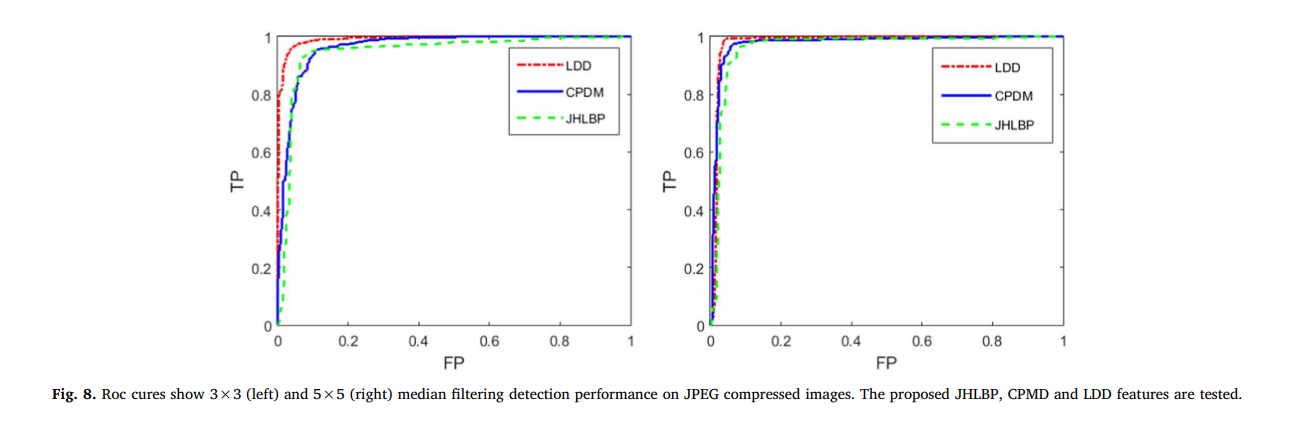

##### **Plotting the ROC Curves**

In [46]:
# Plot ROC Curve for all classes (following OvR Strategy)

# JHLBP Features
red_y_test_JHLBP = np.where(y_test_JHLBP == 'red', 1, 0)
blue_y_test_JHLBP = np.where(y_test_JHLBP == 'blue', 1, 0)
green_y_test_JHLBP = np.where(y_test_JHLBP == 'green', 1, 0)
yellow_y_test_JHLBP = np.where(y_test_JHLBP == 'yellow', 1, 0)

red_y_pred_jhlbp = np.where(y_pred_jhlbp == 'red', 1, 0)
blue_y_pred_jhlbp = np.where(y_pred_jhlbp == 'blue', 1, 0)
green_y_pred_jhlbp = np.where(y_pred_jhlbp == 'green', 1, 0)
yellow_y_pred_jhlbp = np.where(y_pred_jhlbp == 'yellow', 1, 0)

red_y_pred_jhlbp_2 = np.where(y_pred_jhlbp_2 == 'red', 1, 0)
blue_y_pred_jhlbp_2 = np.where(y_pred_jhlbp_2 == 'blue', 1, 0)
green_y_pred_jhlbp_2 = np.where(y_pred_jhlbp_2 == 'green', 1, 0)
yellow_y_pred_jhlbp_2 = np.where(y_pred_jhlbp_2 == 'yellow', 1, 0)

# CPDM Features
red_y_test_CPDM = np.where(y_test_CPDM == 'red', 1, 0)
blue_y_test_CPDM = np.where(y_test_CPDM == 'blue', 1, 0)
green_y_test_CPDM = np.where(y_test_CPDM == 'green', 1, 0)
yellow_y_test_CPDM = np.where(y_test_CPDM == 'yellow', 1, 0)

red_y_pred_cpdm = np.where(y_pred_cpdm == 'red', 1, 0)
blue_y_pred_cpdm = np.where(y_pred_cpdm == 'blue', 1, 0)
green_y_pred_cpdm = np.where(y_pred_cpdm == 'green', 1, 0)
yellow_y_pred_cpdm = np.where(y_pred_cpdm == 'yellow', 1, 0)

red_y_pred_cpdm_2 = np.where(y_pred_cpdm_2 == 'red', 1, 0)
blue_y_pred_cpdm_2 = np.where(y_pred_cpdm_2 == 'blue', 1, 0)
green_y_pred_cpdm_2 = np.where(y_pred_cpdm_2 == 'green', 1, 0)
yellow_y_pred_cpdm_2 = np.where(y_pred_cpdm_2 == 'yellow', 1, 0)

# LDD Features
red_y_test_LDD = np.where(y_test_LDD == 'red', 1, 0)
blue_y_test_LDD = np.where(y_test_LDD == 'blue', 1, 0)
green_y_test_LDD = np.where(y_test_LDD == 'green', 1, 0)
yellow_y_test_LDD = np.where(y_test_LDD == 'yellow', 1, 0)

red_y_pred_ldd = np.where(y_pred_ldd == 'red', 1, 0)
blue_y_pred_ldd = np.where(y_pred_ldd == 'blue', 1, 0)
green_y_pred_ldd = np.where(y_pred_ldd == 'green', 1, 0)
yellow_y_pred_ldd = np.where(y_pred_ldd == 'yellow', 1, 0)

red_y_pred_ldd_2 = np.where(y_pred_ldd_2 == 'red', 1, 0)
blue_y_pred_ldd_2 = np.where(y_pred_ldd_2 == 'blue', 1, 0)
green_y_pred_ldd_2 = np.where(y_pred_ldd_2 == 'green', 1, 0)
yellow_y_pred_ldd_2 = np.where(y_pred_ldd_2 == 'yellow', 1, 0)

In [47]:
# Plotting the ROC Curve for JHLBP Features
fpr_red_jhlbp, tpr_red_jhlbp, thresholds_red_jhlbp = roc_curve(red_y_test_JHLBP, red_y_pred_jhlbp)
fpr_blue_jhlbp, tpr_blue_jhlbp, thresholds_blue_jhlbp = roc_curve(blue_y_test_JHLBP, blue_y_pred_jhlbp)
fpr_green_jhlbp, tpr_green_jhlbp, thresholds_green_jhlbp = roc_curve(green_y_test_JHLBP, green_y_pred_jhlbp)
fpr_yellow_jhlbp, tpr_yellow_jhlbp, thresholds_yellow_jhlbp = roc_curve(yellow_y_test_JHLBP, yellow_y_pred_jhlbp)

fpr_red_jhlbp_2, tpr_red_jhlbp_2, thresholdss_red_jhlbp_2 = roc_curve(red_y_test_JHLBP, red_y_pred_jhlbp_2)
fpr_blue_jhlbp_2, tpr_blue_jhlbp_2, thresholdss_blue_jhlbp_2 = roc_curve(blue_y_test_JHLBP, blue_y_pred_jhlbp_2)
fpr_green_jhlbp_2, tpr_green_jhlbp_2, thresholdss_green_jhlbp_2 = roc_curve(green_y_test_JHLBP, green_y_pred_jhlbp_2)
fpr_yellow_jhlbp_2, tpr_yellow_jhlbp_2, thresholdss_yellow_jhlbp_2 = roc_curve(yellow_y_test_JHLBP, yellow_y_pred_jhlbp_2)

# Plotting the ROC Curve for CPDM Features
fpr_red_cpdm, tpr_red_cpdm, thresholds_red_cpdm = roc_curve(red_y_test_CPDM, red_y_pred_cpdm)
fpr_blue_cpdm, tpr_blue_cpdm, thresholds_blue_cpdm = roc_curve(blue_y_test_CPDM, blue_y_pred_cpdm)
fpr_green_cpdm, tpr_green_cpdm, thresholds_green_cpdm = roc_curve(green_y_test_CPDM, green_y_pred_cpdm)
fpr_yellow_cpdm, tpr_yellow_cpdm, thresholds_yellow_cpdm = roc_curve(yellow_y_test_CPDM, yellow_y_pred_cpdm)

fpr_red_cpdm_2, tpr_red_cpdm_2, thresholds_red_cpdm_2 = roc_curve(red_y_test_CPDM, red_y_pred_cpdm_2)
fpr_blue_cpdm_2, tpr_blue_cpdm_2, thresholds_blue_cpdm_2 = roc_curve(blue_y_test_CPDM, blue_y_pred_cpdm_2)
fpr_green_cpdm_2, tpr_green_cpdm_2, thresholds_green_cpdm_2 = roc_curve(green_y_test_CPDM, green_y_pred_cpdm_2)
fpr_yellow_cpdm_2, tpr_yellow_cpdm_2, thresholds_yellow_cpdm_2 = roc_curve(yellow_y_test_CPDM, yellow_y_pred_cpdm_2)


# Plotting the ROC Curve for LDD Features
fpr_red_ldd, tpr_red_ldd, thresholds_red_ldd = roc_curve(red_y_test_LDD, red_y_pred_ldd)
fpr_blue_ldd, tpr_blue_ldd, thresholds_blue_ldd = roc_curve(blue_y_test_LDD, blue_y_pred_ldd)
fpr_green_ldd, tpr_green_ldd, thresholds_green_ldd = roc_curve(green_y_test_LDD, green_y_pred_ldd)
fpr_yellow_ldd, tpr_yellow_ldd, thresholds_yellow_ldd = roc_curve(yellow_y_test_LDD, yellow_y_pred_ldd)

fpr_red_ldd_2, tpr_red_ldd_2, thresholds_red_ldd_2 = roc_curve(red_y_test_LDD, red_y_pred_ldd_2)
fpr_blue_ldd_2, tpr_blue_ldd_2, thresholds_blue_ldd_2 = roc_curve(blue_y_test_LDD, blue_y_pred_ldd_2)
fpr_green_ldd_2, tpr_green_ldd_2, thresholds_green_ldd_2 = roc_curve(green_y_test_LDD, green_y_pred_ldd_2)
fpr_yellow_ldd_2, tpr_yellow_ldd_2, thresholds_yellow_ldd_2 = roc_curve(yellow_y_test_LDD, yellow_y_pred_ldd_2)

**Median Filtered 3x3 Images ROC Curve**

Below Curve is based on Model Trained on Custom Parameters

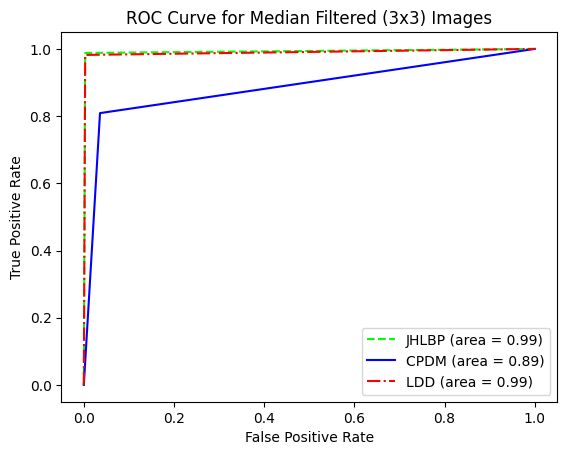

In [48]:
# Plotting the ROC Curve for JHLBP Features Red Class
plt.plot(fpr_red_jhlbp, tpr_red_jhlbp, label='JHLBP (area = %0.2f)' % auc(fpr_red_jhlbp, tpr_red_jhlbp), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features Red Class
plt.plot(fpr_red_cpdm, tpr_red_cpdm, label='CPDM (area = %0.2f)' % auc(fpr_red_cpdm, tpr_red_cpdm), color='blue')
# Plotting the ROC Curve for LDD Features Red Class
plt.plot(fpr_red_ldd, tpr_red_ldd, label='LDD (area = %0.2f)' % auc(fpr_red_ldd, tpr_red_ldd), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Median Filtered (3x3) Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Below Curve is based on Model Trained on Original Parameters

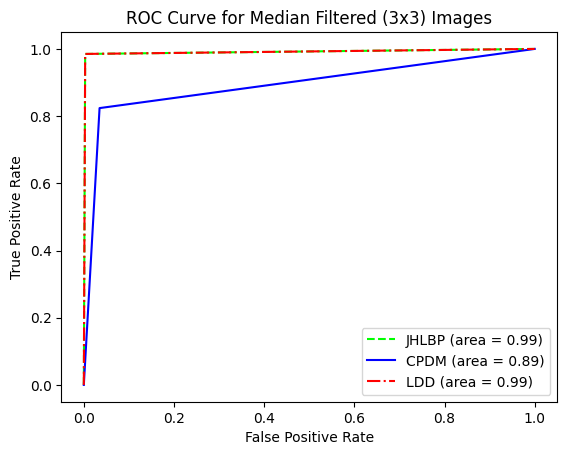

In [49]:
# Plotting the ROC Curve for JHLBP Features Red Class using Original Parameters
plt.plot(fpr_red_jhlbp_2, tpr_red_jhlbp_2, label='JHLBP (area = %0.2f)' % auc(fpr_red_jhlbp_2, tpr_red_jhlbp_2), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features Red Class using Original Parameters
plt.plot(fpr_red_cpdm_2, tpr_red_cpdm_2, label='CPDM (area = %0.2f)' % auc(fpr_red_cpdm_2, tpr_red_cpdm_2), color='blue')
# Plotting the ROC Curve for LDD Features Red Class using Original Parameters
plt.plot(fpr_red_ldd_2, tpr_red_ldd_2, label='LDD (area = %0.2f)' % auc(fpr_red_ldd_2, tpr_red_ldd_2), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Median Filtered (3x3) Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**Median Filtered 5x5 Images ROC Curve**

Below Curve is based on Model Trained on Custom Parameters

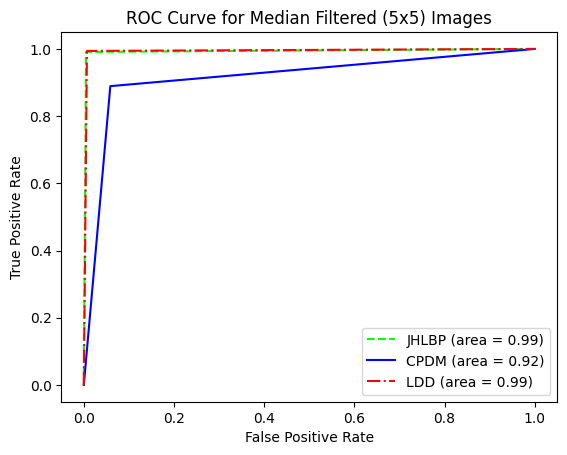

In [50]:
# Plotting the ROC Curve for JHLBP Features Yellow Class
plt.plot(fpr_yellow_jhlbp, tpr_yellow_jhlbp, label='JHLBP (area = %0.2f)' % auc(fpr_yellow_jhlbp, tpr_yellow_jhlbp), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features Yellow Class
plt.plot(fpr_yellow_cpdm, tpr_yellow_cpdm, label='CPDM (area = %0.2f)' % auc(fpr_yellow_cpdm, tpr_yellow_cpdm), color='blue')
# Plotting the ROC Curve for LDD Features Yellow Class
plt.plot(fpr_yellow_ldd, tpr_yellow_ldd, label='LDD (area = %0.2f)' % auc(fpr_yellow_ldd, tpr_yellow_ldd), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Median Filtered (5x5) Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Below Curve is based on Model Trained on Original Parameters

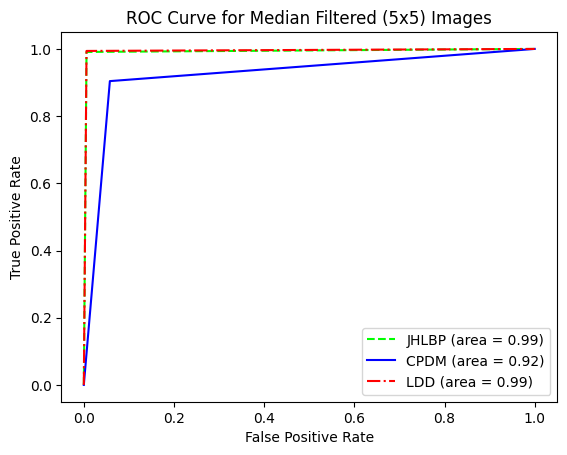

In [51]:
# Plotting the ROC Curve for JHLBP Features Yellow Class using Original Parameters
plt.plot(fpr_yellow_jhlbp_2, tpr_yellow_jhlbp_2, label='JHLBP (area = %0.2f)' % auc(fpr_yellow_jhlbp_2, tpr_yellow_jhlbp_2), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features Yellow Class using Original Parameters
plt.plot(fpr_yellow_cpdm_2, tpr_yellow_cpdm_2, label='CPDM (area = %0.2f)' % auc(fpr_yellow_cpdm_2, tpr_yellow_cpdm_2), color='blue')
# Plotting the ROC Curve for LDD Features Yellow Class using Original Parameters
plt.plot(fpr_yellow_ldd_2, tpr_yellow_ldd_2, label='LDD (area = %0.2f)' % auc(fpr_yellow_ldd_2, tpr_yellow_ldd_2), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Median Filtered (5x5) Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**Original Images ROC Curve**

Below Curve is based on Model Trained on Custom Parameters

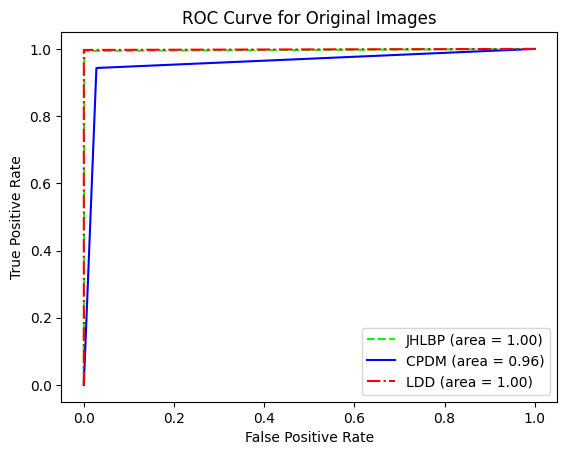

In [52]:
# Plotting the ROC Curve for JHLBP Features blue Class
plt.plot(fpr_blue_jhlbp, tpr_blue_jhlbp, label='JHLBP (area = %0.2f)' % auc(fpr_blue_jhlbp, tpr_blue_jhlbp), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features blue Class
plt.plot(fpr_blue_cpdm, tpr_blue_cpdm, label='CPDM (area = %0.2f)' % auc(fpr_blue_cpdm, tpr_blue_cpdm), color='blue')
# Plotting the ROC Curve for LDD Features blue Class
plt.plot(fpr_blue_ldd, tpr_blue_ldd, label='LDD (area = %0.2f)' % auc(fpr_blue_ldd, tpr_blue_ldd), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Original Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Below Curve is based on Model Trained on Original Parameters

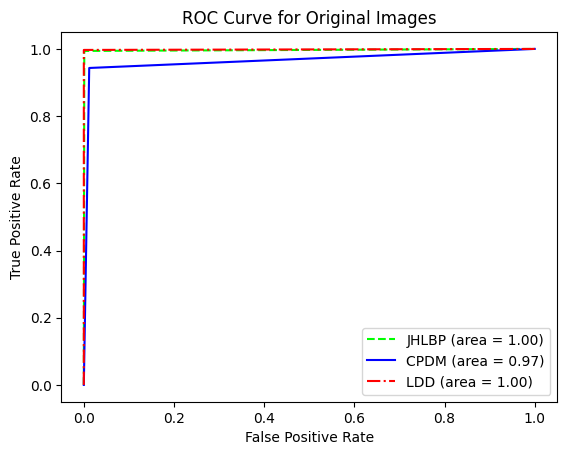

In [53]:
# Plotting the ROC Curve for JHLBP Features blue Class using Original Parameters
plt.plot(fpr_blue_jhlbp_2, tpr_blue_jhlbp_2, label='JHLBP (area = %0.2f)' % auc(fpr_blue_jhlbp_2, tpr_blue_jhlbp_2), color='lime', linestyle='--')\
# Plotting the ROC Curve for CPDM Features blue Class using Original Parameters
plt.plot(fpr_blue_cpdm_2, tpr_blue_cpdm_2, label='CPDM (area = %0.2f)' % auc(fpr_blue_cpdm_2, tpr_blue_cpdm_2), color='blue')
# Plotting the ROC Curve for LDD Features blue Class using Original Parameters
plt.plot(fpr_blue_ldd_2, tpr_blue_ldd_2, label='LDD (area = %0.2f)' % auc(fpr_blue_ldd_2, tpr_blue_ldd_2), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Original Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

**Average Filtered 3x3 Images ROC Curve**

Below Curve is based on Model Trained on Custom Parameters

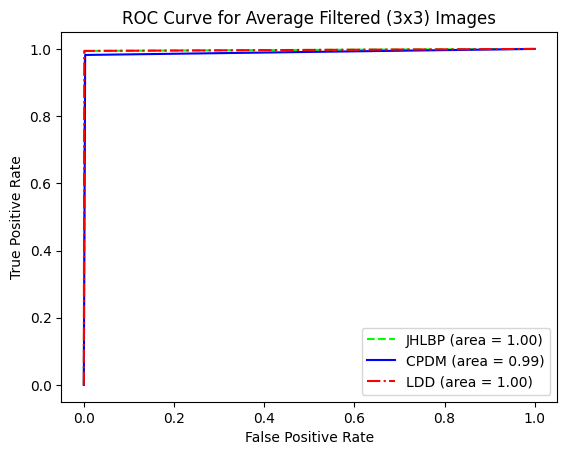

In [54]:
# Plotting the ROC Curve for JHLBP Features green Class
plt.plot(fpr_green_jhlbp, tpr_green_jhlbp, label='JHLBP (area = %0.2f)' % auc(fpr_green_jhlbp, tpr_green_jhlbp), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features green Class
plt.plot(fpr_green_cpdm, tpr_green_cpdm, label='CPDM (area = %0.2f)' % auc(fpr_green_cpdm, tpr_green_cpdm), color='blue')
# Plotting the ROC Curve for LDD Features green Class
plt.plot(fpr_green_ldd, tpr_green_ldd, label='LDD (area = %0.2f)' % auc(fpr_green_ldd, tpr_green_ldd), color='red', linestyle='-.')

# Title and Labels
plt.title('ROC Curve for Average Filtered (3x3) Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Below Curve is based on Model Trained on Original Parameters

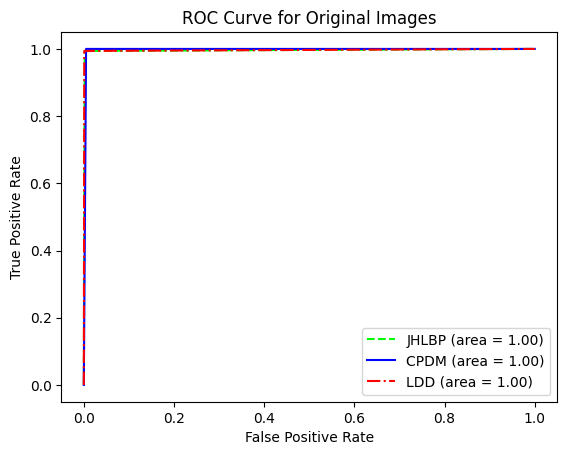

In [55]:
# Plotting the ROC Curve for JHLBP Features green Class using Original Parameters
plt.plot(fpr_green_jhlbp_2, tpr_green_jhlbp_2, label='JHLBP (area = %0.2f)' % auc(fpr_green_jhlbp_2, tpr_green_jhlbp_2), color='lime', linestyle='--')
# Plotting the ROC Curve for CPDM Features green Class using Original Parameters
plt.plot(fpr_green_cpdm_2, tpr_green_cpdm_2, label='CPDM (area = %0.2f)' % auc(fpr_green_cpdm_2, tpr_green_cpdm_2), color='blue')
# Plotting the ROC Curve for LDD Features green Class using Original Parameters
plt.plot(fpr_green_ldd_2, tpr_green_ldd_2, label='LDD (area = %0.2f)' % auc(fpr_green_ldd_2, tpr_green_ldd_2), color='red', linestyle='-.')
# Title and Labels
plt.title('ROC Curve for Original Images')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### **Finding $P_e$:** $$P_e = min \left\{ \dfrac{P_{fp} + 1 - P_{tp}}{2} \right\}$$

In [56]:
# Calculate the Pe for JHLBP Features
Pe_red_jhlbp = min((fpr_red_jhlbp + 1 - tpr_red_jhlbp)/2)
Pe_blue_jhlbp = min((fpr_blue_jhlbp + 1 - tpr_blue_jhlbp)/2)
Pe_green_jhlbp = min((fpr_green_jhlbp + 1 - tpr_green_jhlbp)/2)
Pe_yellow_jhlbp = min((fpr_yellow_jhlbp + 1 - tpr_yellow_jhlbp)/2)

# Calculate the Pe for JHLBP Features using Original Parameters
Pe_red_jhlbp_2 = min((fpr_red_jhlbp_2 + 1 - tpr_red_jhlbp_2)/2)
Pe_blue_jhlbp_2 = min((fpr_blue_jhlbp_2 + 1 - tpr_blue_jhlbp_2)/2)
Pe_green_jhlbp_2 = min((fpr_green_jhlbp_2 + 1 - tpr_green_jhlbp_2)/2)
Pe_yellow_jhlbp_2 = min((fpr_yellow_jhlbp_2 + 1 - tpr_yellow_jhlbp_2)/2)

In [57]:
# Calculate the Pe for CPDM Features
Pe_red_cpdm = min((fpr_red_cpdm + 1 - tpr_red_cpdm)/2)
Pe_blue_cpdm = min((fpr_blue_cpdm + 1 - tpr_blue_cpdm)/2)
Pe_green_cpdm = min((fpr_green_cpdm + 1 - tpr_green_cpdm)/2)
Pe_yellow_cpdm = min((fpr_yellow_cpdm + 1 - tpr_yellow_cpdm)/2)

# Calculate the Pe for CPDM Features using Original Parameters
Pe_red_cpdm_2 = min((fpr_red_cpdm_2 + 1 - tpr_red_cpdm_2)/2)
Pe_blue_cpdm_2 = min((fpr_blue_cpdm_2 + 1 - tpr_blue_cpdm_2)/2)
Pe_green_cpdm_2 = min((fpr_green_cpdm_2 + 1 - tpr_green_cpdm_2)/2)
Pe_yellow_cpdm_2 = min((fpr_yellow_cpdm_2 + 1 - tpr_yellow_cpdm_2)/2)

In [58]:
# Calculate the Pe for LDD Features
Pe_red_ldd = min((fpr_red_ldd + 1 - tpr_red_ldd)/2)
Pe_blue_ldd = min((fpr_blue_ldd + 1 - tpr_blue_ldd)/2)
Pe_green_ldd = min((fpr_green_ldd + 1 - tpr_green_ldd)/2)
Pe_yellow_ldd = min((fpr_yellow_ldd + 1 - tpr_yellow_ldd)/2)

# Calculate the Pe for LDD Features using Original Parameters
Pe_red_ldd_2 = min((fpr_red_ldd_2 + 1 - tpr_red_ldd_2)/2)
Pe_blue_ldd_2 = min((fpr_blue_ldd_2 + 1 - tpr_blue_ldd_2)/2)
Pe_green_ldd_2 = min((fpr_green_ldd_2 + 1 - tpr_green_ldd_2)/2)
Pe_yellow_ldd_2 = min((fpr_yellow_ldd_2 + 1 - tpr_yellow_ldd_2)/2)

In [59]:
# Print the Pe for JHLBP Features
print("Pe (%) for JHLBP Features with Params as powers of 10:")
print(f"MF3 Class: {Pe_red_jhlbp*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_jhlbp*100:.4f}%")
print(f"ORI Class: {Pe_blue_jhlbp*100:.4f}%")
print(f"AVE Class: {Pe_green_jhlbp*100:.4f}%")

Pe (%) for JHLBP Features with Params as powers of 10:
MF3 Class: 0.7466%
MF5 Class: 0.6981%
ORI Class: 0.3484%
AVE Class: 0.3990%


In [60]:
# Print the Pe for JHLBP Features using Original Parameters
print("Pe (%) for JHLBP Features with Original Params:")
print(f"MF3 Class: {Pe_red_jhlbp_2*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_jhlbp_2*100:.4f}%")
print(f"ORI Class: {Pe_blue_jhlbp_2*100:.4f}%")
print(f"AVE Class: {Pe_green_jhlbp_2*100:.4f}%")

Pe (%) for JHLBP Features with Original Params:
MF3 Class: 0.8958%
MF5 Class: 0.7479%
ORI Class: 0.3484%
AVE Class: 0.3990%


In [61]:
# Print the Pe for CPDM Features
print("Pe (%) for CPDM Features")
print(f"MF3 Class: {Pe_red_cpdm*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_cpdm*100:.4f}%")
print(f"ORI Class: {Pe_blue_cpdm*100:.4f}%")
print(f"AVE Class: {Pe_green_cpdm*100:.4f}%")

Pe (%) for CPDM Features
MF3 Class: 11.3469%
MF5 Class: 8.4772%
ORI Class: 4.2316%
AVE Class: 1.0476%


In [62]:
# Print the Pe for CPDM Features using Original Parameters
print("Pe (%) for CPDM Features with Original Params:")
print(f"MF3 Class: {Pe_red_cpdm_2*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_cpdm_2*100:.4f}%")
print(f"ORI Class: {Pe_blue_cpdm_2*100:.4f}%")
print(f"AVE Class: {Pe_green_cpdm_2*100:.4f}%")

Pe (%) for CPDM Features with Original Params:
MF3 Class: 10.5507%
MF5 Class: 7.6789%
ORI Class: 3.4340%
AVE Class: 0.2490%


In [63]:
# Print the Pe for LDD Features
print("Pe (%) for LDD Features")
print(f"MF3 Class: {Pe_red_ldd*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_ldd*100:.4f}%")
print(f"ORI Class: {Pe_blue_ldd*100:.4f}%")
print(f"AVE Class: {Pe_green_ldd*100:.4f}%")

Pe (%) for LDD Features
MF3 Class: 1.0451%
MF5 Class: 0.6480%
ORI Class: 0.1493%
AVE Class: 0.3492%


In [64]:
# Print the Pe for LDD Features using Original Parameters
print("Pe (%) for LDD Features with Original Params:")
print(f"MF3 Class: {Pe_red_ldd_2*100:.4f}%")
print(f"MF5 Class: {Pe_yellow_ldd_2*100:.4f}%")
print(f"ORI Class: {Pe_blue_ldd_2*100:.4f}%")
print(f"AVE Class: {Pe_green_ldd_2*100:.4f}%")

Pe (%) for LDD Features with Original Params:
MF3 Class: 0.8958%
MF5 Class: 0.5982%
ORI Class: 0.1493%
AVE Class: 0.3492%


##### **Displaying Results of $P_e$ in a Tabular Form**

In [65]:
import pandas as pd

# Creating Dataframe for Pe
Pe_df = pd.DataFrame({'JHLBP_10': [Pe_red_jhlbp*100, Pe_yellow_jhlbp*100, Pe_blue_jhlbp*100, Pe_green_jhlbp*100],
                      'JHLBP_2': [Pe_red_jhlbp_2*100, Pe_yellow_jhlbp_2*100, Pe_blue_jhlbp_2*100, Pe_green_jhlbp_2*100],
                      'CPDM_10': [Pe_red_cpdm*100, Pe_yellow_cpdm*100, Pe_blue_cpdm*100, Pe_green_cpdm*100],
                      'CPDM_2': [Pe_red_cpdm_2*100, Pe_yellow_cpdm_2*100, Pe_blue_cpdm_2*100, Pe_green_cpdm_2*100],
                      'LDD_10': [Pe_red_ldd*100, Pe_yellow_ldd*100, Pe_blue_ldd*100, Pe_green_ldd*100],
                      'LDD_2': [Pe_red_ldd_2*100, Pe_yellow_ldd_2*100, Pe_blue_ldd_2*100, Pe_green_ldd_2*100]}
                      ,index=['MF3 - Pe (%)', 'MF5 - Pe (%)', 'ORI - Pe (%)', 'AVE - Pe (%)'])

In [66]:
Pe_df

,JHLBP_10,JHLBP_2,CPDM_10,CPDM_2,LDD_10,LDD_2
MF3 - Pe (%),0.746566,0.895820,11.346855,10.550736,1.045074,0.895820
MF5 - Pe (%),0.698106,0.747907,8.477169,7.678865,0.648007,0.598206
ORI - Pe (%),0.348358,0.348358,4.231633,3.434026,0.149254,0.149254
AVE - Pe (%),0.399003,0.399003,1.047606,0.249004,0.349202,0.349202


## **Conclusion**

As a conclusion, we see that $CPDM$ in its own are not the best features but when combined with $LBP$ features, they compliment them beautifully and create a new feature set i.e. $LDD$ feature set which has the best discriminative ability amongst all the $3$ feature sets discussed in this report.